# L1 Regularization

In [108]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import deque
from sklearn.utils import shuffle
import pandas as pd 
from sklearn.model_selection import train_test_split

##  Data Generation

In [109]:
np.random.seed(42)
N = 1000
X = np.random.randn(N , 1)
noise = 5 * np.random.randn(N , 1)
y = 1 - 2 * X + X ** 2 - 0.5 * X ** 3 + noise

## Design Matrix Creating - Polynomial mapping 

In [110]:
def polynomial(X, degree):
    phi = deque()
    for k in range(1, degree + 1):
        regressor = X ** k
        phi.append(regressor)
    return np.array(phi).T.reshape((len(X), degree))

phi_x = polynomial(X, 15)

## Test - Train splitting and Normalization

In [111]:
X_train, X_test, y_train, y_test = train_test_split(phi_x, y, test_size=0.2)
one_vectors_tr = np.ones((len(X_train), 1))
one_vector_te = np.ones((len(X_test), 1))
scaler_input = MinMaxScaler().fit(X_train)
X_train, X_test = scaler_input.fit_transform(X_train), scaler_input.fit_transform(X_test)
scaler_output = MinMaxScaler().fit(y_train)
y_train, y_test = scaler_output.fit_transform(y_train), scaler_output.fit_transform(y_test)
X_train, X_test = np.hstack((one_vectors_tr, X_train)), np.hstack((one_vector_te, X_test))

## Least Square Solution

In [112]:
def least_square(X_train, y_train):
    X_T_X_train = np.matmul(X_train.T, X_train)
    X_T_Y_train = np.matmul(X_train.T, y_train)
    W = np.matmul(np.linalg.inv(X_T_X_train), X_T_Y_train)
    return W

## Prediction

In [113]:
def predict(X_test, W):
    y_pre = np.matmul(X_test, W)
    return y_pre

## Metrics

In [114]:
def mse_error(y_pre, y_true):
    error = (y_pre-y_true)**2
    return np.mean(error)

## L1 Regularization

In [115]:
def l1_regularization(X_train, y_train, lr=0.1, l=0.8):
    W = least_square(X_train, y_train)
    i = 0
    while (i == 0):
        print(np.linalg.norm(W, ord=1))
        y_pre = np.matmul(X_train, W)
        error = y_train - y_pre
        dW = -2*np.dot(X_train.T, y_train)/len(X_train) + l*np.sign(W)
        W -= lr*dW
        if np.linalg.norm(W, ord=1) < 1:
            i = 1
            
    return W

[[ 1.90961534e+00]
 [-1.33048329e-01]
 [ 4.38355718e-01]
 [-2.89536506e+00]
 [-3.17111075e+00]
 [-3.44964180e+01]
 [ 2.43822298e+01]
 [ 6.04656654e+02]
 [-4.70206833e+01]
 [-3.25715054e+03]
 [-1.74177399e+02]
 [ 7.98671869e+03]
 [ 6.94724762e+02]
 [-9.13569330e+03]
 [-5.94266739e+02]
 [ 3.93623157e+03]]


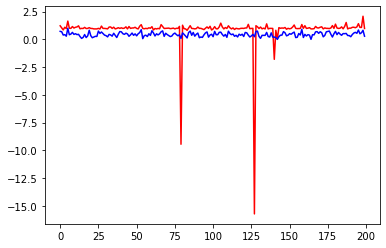

In [123]:
W = least_square(X_train, y_train)
y_pre = predict(X_test, W)
plt.plot(y_pre, 'r')
plt.plot(y_test, 'b')
print(W)

In [124]:
W = l1_regularization(X_train, y_train)
W

26498.06647808384
26496.794099503684
26495.687355570717
26494.470842642724
26493.29696376321
26492.197816786742
26491.010825946727
26489.959828022736
26488.87987793194
26487.811765074774
26486.622692282264
26485.683455909762
26484.482226290795
26483.41235107396
26482.369200434812
26481.261559880186
26480.108420801313
26479.1306118654
26477.98314872284
26476.844313116606
26475.870122866858
26474.708715835826
26473.597097010876
26472.51895447837
26471.484071154893
26470.286819806257
26469.30463499974
26468.15587179147
26467.106758214242
26466.127499259263
26465.22243631847
26464.088480658946
26463.26413186938
26462.219813018935
26461.17755373972
26460.271833772153
26459.272335607697
26458.22940309099
26457.298837245613
26456.323478784565
26455.398134158702
26454.52030562479
26453.61944165836
26452.690325523043
26451.79453168137
26450.907144550205
26449.985558096683
26449.07089530996
26448.196314538793
26447.313784067694
26446.36534935755
26445.464495614036
26444.637539528667
26443.585600

25922.32067940822
25921.55464009197
25921.008643588713
25920.376290272427
25919.628873975562
25919.231627051155
25918.474753369483
25917.966016139686
25917.213166869176
25916.6062746401
25915.96876280803
25915.29388287734
25914.63536588649
25914.047606473483
25913.334799198557
25912.75846235614
25912.269151546563
25911.55461834502
25910.946939673344
25910.323541357055
25909.691656515555
25908.92366876585
25908.47727562122
25907.67837059691
25907.072134498885
25906.4704550248
25905.99943435735
25905.156474175496
25904.844385521566
25903.895668395926
25903.38154394425
25902.751005174658
25902.050629252044
25901.358272509984
25900.893751117284
25900.035940419926
25899.714742654935
25898.99701551085
25898.35473656565
25897.7101654747
25897.104221759575
25896.424529154458
25895.79645480686
25895.130993516057
25894.524828862828
25893.802292714914
25893.424704889214
25892.68144278862
25892.050323994878
25891.38391731945
25890.824687731605
25890.02844327143
25889.524566376847
25888.75094331482

25428.46648372481
25427.900309814548
25427.0514687189
25426.683157896492
25425.816478112116
25425.252798838825
25424.59686495607
25423.998870739786
25423.174300841994
25423.01798981661
25422.060687313773
25421.596676112895
25420.872038220543
25420.32183849263
25419.46913930311
25419.08761049227
25418.266561672448
25417.662329620376
25417.02803454407
25416.461075178806
25415.742987234375
25415.384926491213
25414.51834685029
25413.93063965584
25413.312735245832
25412.641939946254
25411.99538177437
25411.40697319025
25410.641540302273
25410.194316430294
25409.529825241625
25408.965198891437
25408.28723205217
25407.641754538585
25406.96896180474
25406.426537815307
25405.578036910374
25405.20586361208
25404.325250753613
25403.81801967598
25403.263425373916
25402.683895045775
25401.85917421899
25401.543014122595
25400.56695666186
25400.14929678203
25399.365487561685
25398.859962486604
25397.980944246952
25397.644303275152
25396.92001101358
25396.38103282943
25395.67926027284
25395.1330034114

24965.98571409733
24965.617033232284
24965.155722506926
24964.48261817191
24964.087513082242
24963.414929995793
24962.84497454326
24962.32341134132
24961.753061327625
24961.15040725753
24960.644104347095
24960.02241795889
24959.673037826295
24958.992865786313
24958.578571750346
24957.873401513774
24957.394499270053
24956.803238102413
24956.25410720051
24955.629970372538
24955.159198989797
24954.544612810303
24954.173470089154
24953.574296848186
24953.04601684177
24952.422474702154
24951.874474357654
24951.369613078023
24950.6762948776
24950.223560348906
24949.66188124736
24948.98955190683
24948.670204347858
24948.159010994135
24947.35693982609
24947.048022662166
24946.36917184807
24945.744523031157
24945.32153024974
24944.681270691064
24944.053988048363
24943.610892617955
24943.124287056387
24942.574535729145
24942.03812151459
24941.436111701965
24940.88427494378
24940.27977430795
24939.789797479112
24939.13644075355
24938.63634313642
24938.05425549732
24937.509628492255
24937.05933198

24530.7860514264
24530.153327970656
24529.606927107474
24529.13077947147
24528.414360223796
24527.941324713545
24527.36631091788
24526.770908571598
24526.369249352378
24525.851024664036
24525.23302519173
24524.66198131119
24524.16162565966
24523.524744837407
24522.9332797704
24522.54139167766
24521.759909307337
24521.36298899085
24520.921682545166
24520.273704791896
24519.76366523897
24519.27133219842
24518.512970526528
24518.17546398154
24517.448175560246
24516.957076139206
24516.330227884977
24515.8431362161
24515.382166820018
24514.866491360204
24514.214960748024
24513.766457778343
24513.05212945436
24512.606124179867
24511.999682977916
24511.386521059823
24510.925521697216
24510.349099056133
24509.712609597613
24509.384365392696
24508.787781369632
24508.141226436055
24507.703037855114
24507.062622995247
24506.50795436395
24505.883333198202
24505.436195799397
24504.729972814363
24504.248301516924
24503.910401952708
24503.18840681912
24502.700782982483
24502.18678885939
24501.4880674

24087.598739073997
24087.030192707574
24086.598859871992
24085.92775226271
24085.29850052712
24084.944056461776
24084.124118231208
24083.706182856047
24083.14454736955
24082.512868623573
24082.0023231132
24081.627919261853
24080.95559967067
24080.444635409905
24079.900603890637
24079.30468334239
24078.735629407427
24078.20469711115
24077.610981905542
24077.024679328795
24076.602376896495
24076.00274664066
24075.556255719894
24074.978211503458
24074.38952598699
24073.775068500345
24073.3489436265
24072.58808363205
24072.211891642422
24071.53970685062
24071.027606339405
24070.56885512957
24070.036464565128
24069.44797814055
24068.884218668056
24068.29460964338
24067.881478524214
24067.1249236469
24066.597251169675
24066.14122784597
24065.426685772698
24065.0886917101
24064.57184272141
24063.88313969575
24063.41793019354
24062.840413946404
24062.220671410152
24061.675485697167
24061.165675630124
24060.51717802694
24060.038190123116
24059.574968183326
24059.036065033746
24058.41774183971
2

23696.81804395213
23696.089577360195
23695.4626043839
23695.027377928833
23694.373272473313
23693.784408323063
23693.34179185317
23692.79836595229
23692.338943698123
23691.6957747699
23691.178175715562
23690.58101023842
23690.012203966115
23689.46480462029
23688.938083286783
23688.2998913444
23687.82984187761
23687.36929643206
23686.76644714546
23686.280495434265
23685.632095460744
23685.13855649734
23684.527559952527
23684.00845215356
23683.339968750865
23682.895109331148
23682.260228379582
23681.86071981481
23681.28584472052
23680.826334212485
23680.04420605029
23679.747629948037
23679.019872121607
23678.40638151367
23678.0374863822
23677.349924966547
23676.7026959474
23676.511121884563
23675.75271490338
23675.205760266024
23674.770329163974
23674.056489946262
23673.55617390453
23672.97669020261
23672.395394533254
23671.82382232075
23671.276301834943
23670.865393090244
23670.332849017206
23669.723259864368
23669.203780487518
23668.614320738045
23668.020117630298
23667.520855827122
23

23276.120134111687
23275.52883981774
23274.956523894165
23274.407975164813
23273.899031086916
23273.191831677264
23272.75300321639
23272.170989257098
23271.566623342354
23271.001837100663
23270.703569931557
23269.91267909774
23269.564377330047
23268.86410516307
23268.3494159045
23267.77221615766
23267.240004323216
23266.59693795543
23266.121091386274
23265.468824261327
23265.2393885268
23264.49437947513
23263.989493526708
23263.479700547185
23262.78497377865
23262.314723477775
23261.758464832168
23261.077460168428
23260.656346826727
23260.07621417469
23259.518499671016
23259.142170499326
23258.457326798067
23257.86460199084
23257.41038761785
23256.78696381171
23256.17375410058
23255.68889059752
23255.116249904604
23254.46583992872
23254.15078986044
23253.59133686345
23252.943853548768
23252.414805467415
23251.92301236162
23251.170814480436
23250.8021639741
23250.114927617513
23249.58290872984
23249.05039763049
23248.63827731605
23247.99212801394
23247.543714503554
23246.83779209643
232

22859.941625067382
22859.32596127951
22858.76119392876
22858.242765147697
22857.665312239973
22856.990804600442
22856.619886458273
22855.884022727863
22855.35971234449
22854.886380009015
22854.390567565653
22853.77106960248
22853.408181826246
22852.56817368142
22852.245495384257
22851.56881039995
22851.010833169355
22850.400737992095
22849.981024608023
22849.195010652726
22848.907552318036
22848.271261679998
22847.884402434785
22847.128039135456
22846.7679564063
22846.00216784016
22845.566096414062
22844.927278702722
22844.446532336937
22843.72816184477
22843.40646853479
22842.778195162096
22842.31228141347
22841.71389481941
22841.169619208187
22840.575008966844
22840.065850089864
22839.488823923442
22838.89651244541
22838.258057476967
22837.86089488841
22837.31283066949
22836.75049146851
22836.31066999146
22835.604599813647
22835.053266824085
22834.62159918854
22833.8342935989
22833.43727759149
22832.83610540261
22832.240495045084
22831.847003483163
22831.352597313227
22830.6190995907

22467.879829623766
22467.10611824724
22466.759761858742
22466.045729587553
22465.554114960956
22465.128898848827
22464.622174642733
22463.883860379512
22463.542992640392
22462.747712712167
22462.41302353178
22461.672183165378
22461.20051351466
22460.61818898716
22460.077780302898
22459.588976252275
22459.15688789799
22458.386659648975
22458.05407987534
22457.350914719806
22456.770589595573
22456.286589069015
22455.67492225404
22455.04439286841
22454.62757143959
22454.099299071608
22453.564164592117
22453.08208358679
22452.454771875782
22451.807208769416
22451.405881339706
22450.718459727632
22450.157225470226
22449.644846612973
22449.13471606589
22448.514706933987
22448.221069701867
22447.451142605372
22446.919051667424
22446.45295440909
22445.850878214187
22445.123856762417
22444.80598821459
22443.98772227003
22443.610905584435
22443.097969901566
22442.588757656173
22442.027190195073
22441.465842775768
22440.83732392225
22440.38200327935
22439.661977876127
22439.236971215745
22438.606

22047.29835727087
22046.61584913022
22046.297028879075
22045.93231003113
22045.324050509003
22044.971960508054
22044.47872211592
22043.831651644297
22043.52489019506
22042.983809257235
22042.40064805098
22042.097056297585
22041.502818531902
22041.161935357923
22040.734453005927
22040.23861760561
22039.691468710345
22039.293361610697
22038.739764682916
22038.291957209807
22037.74373348453
22037.393554475933
22036.771752577395
22036.520100980248
22036.015164821096
22035.4916155512
22035.041466703973
22034.55661202324
22034.08767989896
22033.60103036819
22033.098319839468
22032.629685500702
22032.150130810718
22031.75439701038
22031.436178950316
22030.740569857517
22030.409780250902
22029.863199066236
22029.345975021562
22028.893734149555
22028.47579728029
22027.774438514592
22027.58619602918
22027.06739861172
22026.568421612537
22026.2432549589
22025.645162876008
22025.083385907
22024.808284741248
22024.156053163155
22023.692881958676
22023.232278545453
22022.74800349578
22022.3667840330

21718.069911727707
21717.35449773423
21717.152420997714
21716.445927004057
21716.073864115773
21715.53097085178
21715.131152173228
21714.43973914564
21714.253617788985
21713.669272695857
21713.28486982549
21712.850483753704
21712.284490567978
21711.767735222784
21711.44225772255
21710.756746425337
21710.46511957635
21709.894991351182
21709.4057257545
21709.065613496292
21708.641568000534
21708.056391616497
21707.657257313906
21707.033904244025
21706.745796951036
21706.068146947367
21705.696947802302
21705.162914503373
21704.71155728151
21704.282302273044
21703.990121557566
21703.281489529312
21702.99264286099
21702.403805390037
21701.99026777551
21701.37298680481
21701.072610011703
21700.446227505738
21700.01841381025
21699.689214774888
21699.213230731977
21698.618682731776
21698.31963672029
21697.669860679278
21697.22304344354
21696.851071737132
21696.206532195694
21695.784455196543
21695.364964321194
21694.912898572733
21694.5607641209
21694.069614174492
21693.46447457529
21693.09321

21372.05165427742
21371.60563768803
21371.124964075283
21370.92424517269
21370.28026450678
21370.02458951805
21369.535533336235
21369.229833217018
21368.634688185608
21368.494618580677
21368.021586432216
21367.733813119463
21367.276582280967
21366.949736123584
21366.38518627845
21366.26529951278
21365.573284717397
21365.32059338574
21364.83298795672
21364.461593632674
21364.178677434647
21363.830714528274
21363.342320957352
21363.056492008232
21362.52064016411
21362.20683427518
21361.7771651835
21361.28928614409
21361.053490290993
21360.52988637982
21360.126249363984
21360.023856268024
21359.454878460143
21359.055062726744
21358.777905008137
21358.233968317072
21357.873352706796
21357.55101711602
21357.00949221028
21356.67018992606
21356.293295713826
21356.014854409943
21355.544495104194
21355.275149774232
21354.753037748098
21354.379413527473
21353.999898728747
21353.58964104035
21353.119658507952
21352.90786761845
21352.31022804269
21352.13698895796
21351.769498371832
21351.260743043

21103.54561918842
21103.35508629466
21103.034420147993
21102.77843119343
21102.2450991021
21102.10840527918
21101.63315133279
21101.325429643264
21101.01571055763
21100.73732624817
21100.15124500413
21100.20412455446
21099.72258144807
21099.424825302398
21099.17260807377
21098.790065778085
21098.305398213255
21098.285338208858
21097.58694777649
21097.531743468513
21096.979020741073
21096.80542679379
21096.47783603612
21096.21725393428
21095.88498481694
21095.56204236138
21095.144161086086
21094.904153444964
21094.43792617928
21094.225029822122
21093.78643115941
21093.51871896033
21093.317012267187
21092.94321611408
21092.66538910241
21092.213770458664
21091.97384641877
21091.63806251662
21091.208358077634
21090.963600766343
21090.575842481965
21090.22370207449
21090.15255174324
21089.72058392255
21089.306441792447
21089.15724613869
21088.701646246052
21088.300588615923
21088.115299222947
21087.649697101275
21087.264221352758
21087.161971509107
21086.712799150773
21086.525105804874
2108

20870.160216168933
20869.659438259063
20869.411615170924
20868.97838783324
20868.725865098797
20868.318893674368
20868.01042992681
20867.64856529707
20867.380994356943
20867.13603541552
20866.81579618546
20866.53777673691
20866.051645747986
20865.81417192387
20865.540401089842
20865.001684946605
20864.801247773263
20864.441807884737
20864.02646952944
20863.933160408247
20863.561470311506
20863.190033126586
20862.90155722209
20862.516086336564
20862.21792015253
20861.76495221602
20861.616920663022
20861.07358375661
20860.903296141973
20860.701265993448
20860.258620704626
20859.98821687943
20859.700845107523
20859.18299458435
20859.07599959144
20858.56843628433
20858.29861263295
20857.948109631772
20857.585998977916
20857.427394108603
20857.038492806227
20856.763060253048
20856.39745582352
20856.05343809416
20855.690248462946
20855.461211095757
20854.951101687868
20854.75336403134
20854.36004021072
20854.154180689948
20853.843072144784
20853.57693919276
20853.014723709315
20852.934497651

20654.435891484045
20654.19023034258
20653.985967600267
20653.542057559942
20653.37513772597
20652.840102435646
20652.676166440346
20652.206364691945
20651.97790477752
20651.49856628963
20651.268893752094
20650.931074765194
20650.692219173885
20650.349912629834
20650.1438050861
20649.519146501436
20649.55154985831
20648.960492308346
20648.616642018445
20648.455829087085
20647.986488295654
20647.60442567359
20647.597445293817
20647.073932288222
20646.766813843213
20646.514441150408
20646.10291016708
20645.73293124114
20645.464716392646
20645.03846075847
20644.749609249877
20644.39309039448
20644.2152365433
20643.926781843667
20643.54967047726
20643.189162625313
20642.91893014292
20642.430997821983
20642.303415808397
20641.747436992242
20641.58754307629
20641.131709915033
20641.022092790936
20640.59410136328
20640.351668762953
20639.912164068766
20639.64210120764
20639.220683650732
20639.068722109703
20638.434501203323
20638.42314591998
20637.89142884539
20637.67252301599
20637.540601144

20423.835160950235
20423.56726374066
20423.086118307816
20422.989154509272
20422.37534138225
20422.280756112865
20421.744791664743
20421.57824081114
20421.23324834605
20421.094471888133
20420.490882177022
20420.403455449727
20419.8938546857
20419.70373717502
20419.12053138433
20419.143064448053
20418.400411578812
20418.384124507054
20418.00130691091
20417.762285217366
20417.36519875486
20417.100890105638
20416.638496098465
20416.436988600813
20415.90968479906
20415.899440544024
20415.208419676263
20415.095237721842
20414.85921444882
20414.431191618845
20414.181639765473
20413.866365020967
20413.352440676957
20413.197889259303
20412.74931308556
20412.452379167305
20412.02023068368
20411.879726713305
20411.449884001566
20411.307338673745
20410.85731859738
20410.567395156395
20410.209876778943
20409.974228759704
20409.409666972613
20409.302470086135
20408.814808882864
20408.59361548991
20408.231190694503
20408.143111686215
20407.504176907416
20407.40589181098
20406.948594524692
20406.6227

20208.887590772
20208.676274156245
20208.39241917475
20207.985684658786
20207.867963409888
20207.42631034469
20207.033852250603
20206.831336941475
20206.392318708746
20206.02158097083
20205.81366593983
20205.297157795903
20205.172992037624
20204.792611872115
20204.60535890921
20204.16353982562
20203.8467980297
20203.51204462311
20203.20677675963
20202.81374271623
20202.549102142126
20202.14710006464
20201.824182101278
20201.63652121326
20201.32528457698
20200.93256826118
20200.657299026523
20200.276166006795
20199.88520922746
20199.651162831713
20199.244126853966
20198.853721254272
20198.63258566567
20198.405689334693
20198.023208622893
20197.736121174898
20197.458628647993
20196.869546814938
20196.85680479777
20196.302358883513
20195.95973580356
20195.77977350344
20195.3656546981
20195.016820024808
20194.95688134861
20194.289982705835
20194.28647585173
20193.672228479598
20193.517103880826
20193.022052840417
20192.80896309003
20192.368334025537
20192.177001600336
20191.802284333284
20

19974.763268619237
19974.38014393021
19974.22806850232
19973.70647612292
19973.39080584538
19973.204090383515
19972.61309454681
19972.526654770856
19972.231845077644
19971.860648244423
19971.53984913676
19971.23893235365
19970.821692776946
19970.552450291645
19970.161484295037
19969.898399574253
19969.441669253305
19969.314622696438
19968.862374148957
19968.720767169463
19968.318640498048
19967.997447137626
19967.57795493472
19967.380560080775
19966.855081046284
19966.664602146426
19966.23361491855
19965.96461444589
19965.69410673612
19965.498501812177
19965.01866941669
19964.745311531406
19964.355332959603
19964.109563987953
19963.694109302873
19963.359689567464
19963.118911918198
19962.614810676558
19962.34112535351
19962.259323811155
19961.706116345937
19961.53336486991
19961.176230099787
19960.7187267833
19960.49864135444
19960.116776377756
19959.713058799374
19959.47381651921
19959.084636372518
19958.96236538785
19958.51769780569
19958.345712943214
19957.7879288907
19957.615250596

19737.947723355705
19737.479377797146
19737.244156562596
19736.835686724306
19736.546814108995
19736.152556195913
19736.01307842163
19735.72347097769
19735.23109090838
19735.06372422412
19734.67760471274
19734.177753682663
19734.112091439907
19733.539373976542
19733.286214220385
19733.033246428422
19732.771348147035
19732.324713013506
19732.209737307297
19731.653955712274
19731.41300034337
19731.071922941053
19730.739963722517
19730.28751464972
19730.124961591995
19729.60205441028
19729.612764099278
19729.085608916997
19728.906419512758
19728.48010607836
19728.125662414182
19727.834761137994
19727.46030151114
19727.08770757777
19726.84982380567
19726.391382554706
19726.32903706258
19725.92785794827
19725.57252952143
19725.241438313944
19724.865273349358
19724.678123765756
19724.138435884342
19723.974833710912
19723.566594085994
19723.12237742739
19723.158857200786
19722.638420092968
19722.2963174594
19722.120167548732
19721.62396387148
19721.290551751823
19721.074591585588
19720.562118

19518.662827228705
19518.09219123802
19518.009274711367
19517.427790926813
19517.310884617207
19516.7290074922
19516.663959117956
19516.239530507148
19516.01673780963
19515.677325495613
19515.32707205427
19514.882757921034
19514.757354223286
19514.133774223577
19514.10775049051
19513.485710994304
19513.402182344766
19512.975353806836
19512.82777014852
19512.39117905396
19512.101160881004
19511.57520828265
19511.59711254543
19510.844248670626
19510.826102772626
19510.268433622223
19510.130223109438
19509.7105951572
19509.659657330532
19508.983133055634
19508.922862506457
19508.441097245355
19508.144500624734
19507.730937770244
19507.54710521199
19507.005799891136
19506.93426784026
19506.52430268227
19506.302954390834
19505.861769844145
19505.644089160727
19505.18951280908
19504.88772990315
19504.60665606059
19504.196038125912
19503.83224631215
19503.64317269718
19503.220482564684
19503.159496612167
19502.613228820253
19502.368060391793
19501.963439459145
19501.66036257135
19501.35647326

19286.007399105794
19285.401199380947
19285.425288780098
19284.71841849965
19284.640500272468
19284.139213635637
19283.996075622883
19283.525288343546
19283.512239987867
19282.91914089083
19282.699150673972
19282.279305183616
19282.120791420017
19281.404761374386
19281.561848936715
19280.82436535658
19280.65333735576
19280.48139570077
19280.08806148039
19279.692196666183
19279.511235452803
19278.934281239504
19278.84172831708
19278.284062928098
19278.156070515433
19277.645164702175
19277.431962454182
19277.11935272384
19276.934828453122
19276.407088188207
19276.300760923878
19275.703643464156
19275.588008997096
19275.038133121365
19274.939032463088
19274.308751309283
19274.31371340005
19273.78726871271
19273.709841131324
19273.160187324705
19273.039765522793
19272.415062200143
19272.44350622643
19271.78986466136
19271.647213829536
19271.15158763986
19271.049927876018
19270.495555380243
19270.607618244572
19269.902809670195
19269.69839456979
19269.40362231248
19269.00051923992
19268.570

19045.74655603466
19045.323821105067
19045.115549418144
19044.675047038803
19044.418518649454
19044.2015946148
19043.909430346343
19043.469634442554
19043.21837850743
19042.85353384039
19042.479027987334
19042.126857317235
19041.930126390365
19041.374213145304
19041.253701899725
19040.898236717374
19040.673168414076
19040.23222952333
19039.985429177505
19039.547667750332
19039.2891540142
19038.920002545023
19038.62745443959
19038.21682344056
19037.92125183731
19037.782221961756
19037.37424783167
19037.026606019434
19036.769075940072
19036.29003566908
19036.031478476783
19035.769238317902
19035.17963534165
19035.147724034767
19034.660175718614
19034.395481325642
19034.238209312494
19033.744376023493
19033.407750266233
19033.16740922123
19032.764282426324
19032.41266899897
19032.096022026148
19031.796557008085
19031.387151919364
19031.21407466248
19030.983575731534
19030.440874052907
19030.29875805555
19029.833286651752
19029.51788470056
19029.180497217025
19028.85782817023
19028.4731553

18800.07226432272
18799.81152969239
18799.44124474911
18799.07646972494
18798.758508638653
18798.60167482163
18798.289887437433
18797.84880753744
18797.620900083428
18797.218635457088
18796.805121209924
18796.646146287494
18796.131001446833
18795.82670401763
18795.63060451547
18795.242879937618
18795.030284901775
18794.665587793883
18794.3054932713
18793.983052660173
18793.714481217095
18793.21062867403
18793.03426525253
18792.627861953406
18792.285149752555
18791.94035018054
18791.83350863683
18791.368410763076
18791.150231625274
18790.69411721659
18790.45558193048
18789.984163572983
18789.759807809845
18789.394759138595
18788.972363713336
18788.785936432534
18788.510644741717
18788.127937076555
18787.895903564808
18787.493193773236
18787.169162238566
18786.794247045127
18786.48716514957
18786.161430330394
18785.683392079718
18785.610325251684
18785.18729036273
18784.908869564493
18784.684719122488
18784.14914003546
18783.942171823845
18783.60715637305
18783.1344290692
18782.907541254

18568.53708582399
18568.130035454917
18567.817614523356
18567.462430382984
18567.171049603836
18566.74963648145
18566.445787937384
18566.167292087986
18565.693813777427
18565.684985792606
18565.217702448303
18564.929004753296
18564.618797341354
18564.16367041805
18563.95583048078
18563.5243443863
18563.202445952455
18562.942670575016
18562.483962426486
18562.40555110392
18562.053135907307
18561.55896257322
18561.471043178408
18560.93150015256
18560.659452119424
18560.32696591191
18560.0033996429
18559.536091659327
18559.43999424035
18559.0777040228
18558.75812446784
18558.50100877272
18558.097581543327
18557.680254946637
18557.512377658823
18557.02067564315
18556.70821772683
18556.44166618327
18556.07531649974
18555.82261236451
18555.569023318298
18555.23552413952
18554.751072071893
18554.58755138428
18554.136304441134
18553.80639824782
18553.56396168229
18553.073666652017
18552.858178426126
18552.61333837219
18552.25379757837
18552.007314436454
18551.569528362204
18551.244826395898
18

18327.96135278289
18327.739810778847
18327.22356674076
18327.086114683887
18326.58252664024
18326.473533232405
18326.140429058956
18325.79969421724
18325.403163030394
18325.13192205853
18324.78125618139
18324.40448116436
18324.092990429286
18323.80036808092
18323.34476596902
18323.296005518285
18322.908787569064
18322.494298590747
18322.16613676583
18321.935886132695
18321.463074318825
18321.17145071869
18320.877846761767
18320.432142955047
18320.116322557096
18320.09234071163
18319.461738079506
18319.45934962868
18318.897270615133
18318.612331336528
18318.285336060908
18317.95324943928
18317.54893651
18317.355051153165
18316.80465799875
18316.732878814197
18316.247771877257
18316.2025762338
18315.612620902466
18315.414188959872
18315.020440017903
18314.719793507065
18314.301518203323
18314.08839499716
18313.627038192026
18313.40371669823
18313.100342514357
18312.909011483203
18312.399968878814
18312.18586348247
18311.800066510412
18311.41179490454
18311.133812795415
18310.835944261893

18113.849825488058
18113.421616347478
18113.331745125397
18112.902621285542
18112.636333311355
18112.23453207058
18111.92917576491
18111.546335712796
18111.290848205954
18110.87428553682
18110.533376764546
18110.2923253364
18109.927980345572
18109.754423871185
18109.363456914245
18108.911091107228
18108.757317877677
18108.34030122807
18107.882290768768
18107.821184227545
18107.20809996033
18107.040527719153
18106.84748905594
18106.44045479934
18106.085270073585
18105.811018053333
18105.461706334812
18105.016077472537
18104.823084605894
18104.426011908843
18104.002902448385
18103.765516209853
18103.53639552795
18103.122944207455
18102.9258551725
18102.45243371722
18102.243145169537
18101.816304555774
18101.51433045179
18101.15645859438
18100.82822337037
18100.46827767951
18100.329942870747
18099.977773727966
18099.60502412782
18099.325564029587
18098.865246256933
18098.635304979733
18098.280769884943
18097.85051102891
18097.636337310396
18097.261392044125
18096.801841470446
18096.920279

17895.297206219602
17894.676655578
17894.53668507239
17894.043402243642
17893.940130437702
17893.413280013476
17893.472459330627
17892.732905991197
17892.689294964213
17892.19177467584
17891.949945110624
17891.440506224535
17891.3697548009
17890.75418411853
17890.657978618685
17890.339302100605
17890.030171749986
17889.65193527757
17889.46897342018
17888.87664578985
17888.75268004525
17888.27171673568
17888.004499217066
17887.614149684774
17887.33402778877
17887.113974833534
17886.79164537779
17886.382445889987
17886.216485017918
17885.5732697084
17885.587422046618
17885.047679225816
17884.757034338112
17884.32815375208
17884.148488355702
17883.79338703514
17883.59469820992
17883.123927085777
17882.961939137607
17882.34223400421
17882.37083736515
17881.674252045388
17881.539238360936
17881.133850967846
17880.812431849776
17880.560948241375
17880.407879615843
17879.806864445047
17879.71631065457
17879.2472384783
17878.92012200869
17878.587347296
17878.32649156246
17877.81809995061
17877

17669.727984201236
17669.226288187867
17669.09384595258
17668.599184465973
17668.278890811962
17667.968362005005
17667.75249125299
17667.2656925134
17667.308777509075
17666.676790383503
17666.40028908361
17666.11241871918
17665.745965903712
17665.34122130425
17665.122325987966
17664.651440320646
17664.433584824365
17664.115153453145
17663.949096502653
17663.446789836147
17663.186497767714
17662.85322728736
17662.429327178805
17662.168758750217
17661.828281206945
17661.442139870087
17661.222685017296
17660.866314047074
17660.73033077378
17660.196159146326
17659.96904615186
17659.582071791854
17659.24613634441
17658.89469845305
17658.677246146275
17658.0706114343
17658.042514338646
17657.611372011786
17657.407369952565
17657.000096246953
17656.807703351595
17656.155062397993
17656.237862087244
17655.55002827776
17655.349478563054
17655.00942151089
17654.70613210572
17654.220582342463
17654.308974942385
17653.654822813452
17653.53745655078
17653.074330287483
17652.86376577395
17652.334121

17444.079193043734
17443.876020143194
17443.5351770181
17443.12868906272
17442.821201579634
17442.509456061154
17442.14646345025
17441.786004206173
17441.476320521786
17441.32561725739
17440.820181989042
17440.722932436478
17440.167466195795
17439.911391304082
17439.646190877247
17439.19271181978
17438.880719758337
17438.685705854226
17438.06214118369
17438.211730049225
17437.610086170796
17437.45873615677
17436.939494692353
17436.785578229086
17436.23829124428
17436.077798296454
17435.59507802817
17435.441996833266
17434.85284472794
17434.904289459853
17434.390231353198
17434.15560560272
17433.655355277195
17433.580678149086
17432.97510748769
17432.796361570097
17432.437712258223
17432.03451966597
17431.706718923717
17431.466576576066
17431.18141940914
17430.883388103954
17430.520592798555
17430.23106469489
17429.77398486739
17429.585385428996
17429.107310655225
17428.78780271552
17428.59043252047
17428.10925097583
17427.97132915051
17427.733564556573
17427.130078290273
17427.07766192

17224.163908789964
17223.80756093422
17223.48660302993
17223.116860720344
17222.826435280727
17222.415887827767
17222.169081100772
17221.81628315315
17221.56764365329
17221.327559987945
17220.91566856209
17220.607569959855
17220.257162357288
17219.91546339477
17219.564759062883
17219.22831218513
17218.89821768502
17218.539646691177
17218.317423958488
17218.17361111944
17217.5023101111
17217.478271656364
17216.966667539655
17216.596781191103
17216.44424919339
17216.037106650212
17215.48842397068
17215.458875256674
17215.019339627517
17214.808326472783
17214.394583227044
17214.17506529994
17213.689419527465
17213.4768595575
17213.04217225476
17212.725292956777
17212.391440231557
17212.0671727049
17211.707385239217
17211.54298534059
17211.183395003492
17210.861649905484
17210.481796901327
17210.196054185835
17209.82816681771
17209.513847241607
17209.173454299722
17208.80754634971
17208.494129465405
17208.30061846949
17207.9456891861
17207.62457116049
17207.206465534007
17207.080565031276


17021.61756846941
17021.30059423024
17021.143455773767
17020.67617848603
17020.372678858574
17020.07043828682
17019.600034896233
17019.454879158387
17018.925641023878
17018.697791974577
17018.38622164767
17018.08343995148
17017.85426351326
17017.473881300844
17017.038535404357
17016.88811300697
17016.416847279037
17016.05747868768
17015.81374823955
17015.403178867913
17015.058091750587
17014.987075632824
17014.5652417836
17014.15116633007
17014.032114733116
17013.485152702153
17013.19622077049
17012.904921358102
17012.54097742374
17012.16680257654
17011.91015049741
17011.67509036975
17011.252870208267
17011.051439143997
17010.63789983811
17010.234185185942
17009.99901417351
17009.621261614266
17009.22548236673
17009.038301465072
17008.48441570591
17008.517015165336
17007.99518353343
17007.775665007182
17007.394513244286
17007.030408943116
17006.69678144071
17006.435507358696
17005.898231063686
17005.84621677964
17005.274160545174
17005.19482883647
17004.851881233095
17004.484501092385


16813.959295254033
16813.681694752762
16813.36300798331
16813.000731079333
16812.62149732076
16812.33292989154
16812.011204515205
16811.712670103396
16811.51292524835
16811.094254014562
16810.667084411536
16810.590558213637
16809.98094015637
16809.73646689726
16809.48130494676
16808.959086338025
16808.81150995587
16808.5413041934
16808.193154582026
16807.87459177341
16807.559602155517
16807.158866231854
16806.850072691566
16806.481418392228
16806.251449709067
16805.72550965547
16805.534269266023
16805.232230624657
16805.023858479504
16804.502950830632
16804.379291861387
16803.82924230404
16803.633976202225
16803.29534791231
16802.90795673681
16802.52407377447
16802.31229504116
16802.014536919807
16801.746478406374
16801.367888619192
16801.05419491719
16800.628769791572
16800.413388873887
16799.995780398127
16799.588241079746
16799.460442049916
16798.899075226465
16798.67712952649
16798.553695638846
16798.00869704376
16797.890792618076
16797.473283069696
16797.057171193082
16796.8309207

16600.072642255316
16599.935448967204
16599.304319850213
16599.172496880157
16598.802558384705
16598.521624840203
16598.28994783267
16597.960754364896
16597.477875527966
16597.372482101397
16596.818559510953
16596.59612680878
16596.149462492074
16595.994147292018
16595.455890795798
16595.442556943603
16594.959123962675
16594.70640038889
16594.28420823211
16594.045822940545
16593.592782634998
16593.34027181865
16592.94858135213
16592.67693371644
16592.21686555412
16592.183461855348
16591.745252016623
16591.472977408324
16591.096984377753
16590.76091118961
16590.4333030096
16590.077573012804
16589.744266431808
16589.39117035981
16589.0007832385
16589.033550372806
16588.374770417016
16588.296235252754
16587.844320960576
16587.422961390832
16587.225350113305
16586.891965207207
16586.315377390267
16586.330101929147
16585.690052710772
16585.688480623085
16585.212489991325
16585.04235019633
16584.484791096973
16584.37637025492
16583.84799966235
16583.616710212907
16583.167293700488
16582.9849

16372.047225516228
16371.835436814174
16371.388197599808
16371.064647472222
16370.768381271087
16370.408219704816
16369.966970495974
16369.831335953268
16369.361069461673
16369.12034496909
16368.96808354669
16368.439618074066
16368.197018090787
16367.839854906504
16367.441725177741
16367.186296182626
16366.809059725514
16366.418073452893
16366.224768726825
16365.79182457291
16365.79244823854
16365.16817479154
16364.952115552533
16364.580510057607
16364.263419787134
16363.830359656833
16363.662137638705
16363.12180700965
16362.955191543733
16362.70179021165
16362.41750946852
16361.932160563625
16361.781863018248
16361.294185521936
16360.985192609778
16360.71781533243
16360.309261839222
16359.936847349669
16359.715807834627
16359.424012782816
16359.083155843393
16358.86445729705
16358.435521891322
16358.051531582783
16357.853460246708
16357.35624277186
16357.09390356173
16356.821392923179
16356.351475094356
16356.115859527687
16355.945978933698
16355.467447783776
16355.285913962693
16354

16144.928522122196
16144.56593189553
16144.263503799215
16143.84992986011
16143.6338651431
16143.140741953857
16143.12153472186
16142.575071590412
16142.47121279173
16141.939688747221
16141.68012543731
16141.35422210964
16140.978783693696
16140.639314636983
16140.338516809174
16139.974261024166
16139.791014047276
16139.441698629416
16139.166554698306
16138.735167007311
16138.44412050311
16138.131747740534
16137.686902173944
16137.444639917847
16137.119522481977
16136.656678720787
16136.471327224435
16136.235663017527
16135.792353398961
16135.490215779711
16135.288768857454
16134.695679840095
16134.63621162228
16134.139436617503
16133.76440512091
16133.549158390328
16133.16470196769
16132.924855486768
16132.70792364021
16132.205881887317
16132.007408097565
16131.535867026478
16131.301123903995
16130.890052137729
16130.547561478794
16130.30810778532
16129.860970309019
16129.73168823839
16129.379149938786
16129.051458405891
16128.690893553008
16128.360928617198
16128.044556316152
16127.71

15901.161935181884
15900.842699392113
15900.511235903441
15900.243914935903
15900.153175035208
15899.473752752561
15899.394557237221
15898.902098425926
15898.665080078767
15898.178963332804
15898.037101944652
15897.506826452809
15897.335339816666
15896.997901568993
15896.847883415343
15896.175653914519
15896.298355161962
15895.508762738515
15895.471684305012
15894.995163036192
15894.722424952863
15894.294932840397
15894.171245028314
15893.657096320478
15893.664728945449
15893.052725426669
15892.909229674511
15892.37593311625
15892.222785313706
15891.716209576858
15891.49250842812
15891.068300180777
15890.849939164118
15890.503860735185
15890.305074553984
15889.893719447813
15889.547679141238
15889.180823038609
15889.03930338849
15888.426643087945
15888.257575184783
15887.862304733297
15887.505902719986
15887.3226176025
15887.065729606717
15886.597203334773
15886.371659125885
15885.926822133752
15885.719061710633
15885.153065854614
15885.110092577303
15884.476280564457
15884.3228136819


15674.673171866893
15674.389228305987
15674.095526359357
15673.830604211267
15673.552745259854
15672.998490990467
15672.903205968141
15672.480434478748
15671.974824335832
15671.981645536602
15671.365374695448
15671.100064721712
15670.924548701752
15670.596174447506
15670.134658274437
15669.972838684876
15669.489183466017
15669.252703764061
15668.817020839795
15668.587348464194
15668.092244448382
15667.919263330132
15667.615889006745
15667.378366455057
15666.91214335882
15666.708797361607
15666.28680486997
15665.96431524781
15665.650114019403
15665.30666836756
15664.927719315667
15664.6573730936
15664.37631264327
15664.140766220968
15663.693744480655
15663.459470567597
15662.9942023235
15662.750382709875
15662.430853397636
15661.97309914653
15661.717747167513
15661.4410224622
15660.862976809853
15661.102233520054
15660.383460716068
15660.180189126968
15659.860996488878
15659.520388782146
15659.019507763061
15658.96453134865
15658.334876191575
15658.211334033575
15657.753114320796
15657.

15457.906860785319
15457.665891110842
15457.4720816211
15456.989279557296
15456.752585906725
15456.355435212274
15456.061002976097
15455.584089325168
15455.440776145822
15454.94847253443
15454.708503067533
15454.533045464163
15454.153084351903
15453.733698621463
15453.609469437135
15452.998416332031
15452.836610774004
15452.400074917707
15452.082368662232
15451.795284585289
15451.354501151898
15451.266124114652
15450.887312317249
15450.481296987906
15450.304362004905
15449.817776736134
15449.513036760782
15449.312429027817
15448.767502282244
15448.522361753756
15448.213161486288
15447.992642647183
15447.632239059649
15447.3705856152
15446.943408988396
15446.591060245839
15446.365366948852
15445.923120558457
15445.610117873373
15445.296398781
15444.923741278988
15444.70563210898
15444.471240830222
15444.006589379102
15443.768902625248
15443.427108038359
15443.068093105872
15442.643611609426
15442.490918028263
15441.924067989115
15441.729675158183
15441.5438623554
15441.112391417882
1544

15252.82889622777
15252.606087323229
15252.18522923633
15251.955005865464
15251.480394792794
15251.280432199941
15250.967090076203
15250.777341721263
15250.245389898548
15250.08941900607
15249.601316259064
15249.352044073508
15248.958848450371
15248.734793888072
15248.226513042973
15248.043343402316
15247.840766378979
15247.385562212683
15247.088147353674
15246.78959801434
15246.389670130786
15246.093117915589
15245.742651568282
15245.382732507414
15245.006479522028
15244.792128981411
15244.486627601556
15244.15751887995
15243.923882225386
15243.452464935319
15243.126966785187
15242.949847814152
15242.310646787331
15242.31972966798
15241.772083408876
15241.482512567214
15241.308984243795
15240.974141156781
15240.565720554108
15240.347319256069
15239.856356695756
15239.685961738101
15239.157447956833
15239.000700693061
15238.519021104505
15238.246045605349
15238.035633811298
15237.730354980802
15237.32147664826
15237.079641702408
15236.705396668887
15236.327718549437
15236.018727425642


15031.349575778744
15030.904558542592
15030.828683964133
15030.264364336608
15029.966908785289
15029.730872925147
15029.276656661994
15028.961292705586
15028.616147754907
15028.351552411437
15028.01452617405
15027.804415817132
15027.382491728247
15027.077544291376
15026.714515796732
15026.43053492044
15026.01048316412
15025.768816336113
15025.326819177413
15025.121688933192
15024.824702386526
15024.594768095729
15024.133474793687
15023.879325795948
15023.457727854384
15023.18619706507
15022.801726089197
15022.473684355493
15022.179995770166
15021.769614541008
15021.623480099752
15021.338854145572
15020.797710677632
15020.72141755372
15020.24665424438
15019.829264767191
15019.722866985388
15019.174511261564
15018.847147334052
15018.69182506644
15018.2971868952
15018.077381183477
15017.697839122593
15017.415191090047
15016.928757154426
15016.765492445764
15016.286812319977
15015.974648497755
15015.692967823556
15015.37437358169
15015.014173863
15014.883468722703
15014.346870918394
15014.

14816.298668589994
14816.299965531702
14815.623715605374
14815.545229129079
14815.191269327768
14814.99316345774
14814.425628559547
14814.417610760389
14813.77597219988
14813.635103255865
14813.212032000332
14812.894068319136
14812.458740326132
14812.354169727161
14811.857490743083
14811.809462638113
14811.257476348477
14811.07000301666
14810.57705996208
14810.373419786218
14809.97516676435
14809.701500526466
14809.120977898881
14809.143296112059
14808.546286725294
14808.58311032018
14808.006312121342
14807.841197958523
14807.272404208565
14807.25663545275
14806.555641020152
14806.525755216262
14805.902914485041
14805.868035795093
14805.175788459737
14805.429719713182
14804.627979813235
14804.645739362906
14804.05576404277
14803.92876760278
14803.308478877258
14803.353659971312
14802.610728130401
14802.625425263706
14802.067512739088
14802.023833889336
14801.467429218683
14801.482832523168
14800.719773234428
14800.760985357914
14800.13780500686
14799.985848025308
14799.482958283126
147

14592.638758657293
14592.215726697988
14592.114028885986
14591.625345731112
14591.280193630078
14590.961402384253
14590.759397798458
14590.109363770483
14590.118529346491
14589.549383853537
14589.252700454166
14589.13384757836
14588.7299972209
14588.403273100083
14588.116813414123
14587.684895251748
14587.433861776502
14586.977670210861
14586.783299872573
14586.3376189621
14586.004957388423
14585.772834748122
14585.457045367579
14585.193488213776
14584.844750960398
14584.471753229654
14584.211946313473
14583.770154026879
14583.549759029243
14583.06500594498
14582.83673857519
14582.467303677482
14582.25287313422
14581.920065287646
14581.675480243803
14581.127570169348
14581.011875054777
14580.525125113189
14580.209951875822
14579.8532069807
14579.65082701566
14579.051803813887
14579.235858234713
14578.619313302424
14578.302821693684
14578.114418699395
14577.662213728005
14577.267052080322
14577.075603658057
14576.544880545176
14576.373654268513
14575.910958972825
14575.823537978133
1457

14385.016994318572
14384.57530528566
14384.33769759785
14383.862409902875
14383.681979079245
14383.165051311185
14383.008519905774
14382.496597839157
14382.461695500308
14382.00717219105
14381.768316485752
14381.290687652388
14381.132467660991
14380.54703724101
14380.441572983338
14379.9879915747
14379.591216344648
14379.417905845621
14379.132752820646
14378.728231547833
14378.610717978316
14378.035836944106
14377.838855656406
14377.511118266655
14377.07463051421
14376.760608187742
14376.449408990671
14376.12163385023
14375.854192770072
14375.614483137384
14375.25784481271
14374.78806275804
14374.67453108106
14374.130842347364
14373.838189458776
14373.613701861552
14373.169196105437
14372.835523301015
14372.704580113757
14372.253823244482
14372.036380673457
14371.581631683905
14371.347501343545
14370.92408698305
14370.674291992535
14370.239540257171
14369.981501692599
14369.524335249249
14369.446171178915
14369.101280015513
14368.654968239056
14368.47931608807
14368.018160501066
14367.

14161.368742423703
14161.074611346838
14160.607136443745
14160.380586423707
14160.052804798539
14159.600966461057
14159.531690433738
14159.102471113529
14158.801363329098
14158.451862492042
14158.123026645886
14157.77237849309
14157.441907679146
14157.041615992115
14156.86062777638
14156.276084771052
14156.366732356582
14155.885140698736
14155.537844866773
14155.246746874283
14154.888569814679
14154.509275964407
14154.248684778173
14153.847876388674
14153.52719710008
14153.098915963896
14153.092342219044
14152.564418494441
14152.28484725045
14152.061186487575
14151.528010006818
14151.316054346382
14150.984496316998
14150.509752398735
14150.341101268175
14149.928721096345
14149.715405176677
14149.421663495998
14149.124657886954
14148.62948980794
14148.465969057204
14147.991737819604
14147.709328228651
14147.363007086
14147.068267356386
14146.62754279828
14146.568629766858
14146.05621562157
14145.963259752556
14145.321898703474
14145.28700392279
14144.765634412059
14144.477362809095
1414

13949.603519361708
13949.028679385734
13948.988845433913
13948.429820939578
13948.19658999314
13947.840540362635
13947.485689594243
13947.126361021776
13946.857564650847
13946.423164704682
13946.346092290223
13945.82684592488
13945.765342778459
13945.127015398393
13945.012262585158
13944.513900190599
13944.309507162941
13943.853313567077
13943.639558221148
13943.155484727478
13943.172569755308
13942.559853682009
13942.529191260703
13941.866315235788
13941.786230241552
13941.31625688821
13941.01782052562
13940.632162830403
13940.39940664806
13939.854015178877
13939.920735849537
13939.40383793227
13939.097077462047
13938.84463498115
13938.517425349508
13937.970178884603
13937.919598633594
13937.354816895557
13937.070703696998
13936.865526801907
13936.537103495943
13936.167588788576
13935.98538617318
13935.464898262202
13935.238799447834
13934.773681746268
13934.609692268838
13934.069108716672
13933.888447462308
13933.466481584353
13933.334433076983
13932.939925499442
13932.69085524019
13

13734.581143417425
13734.353740680384
13733.97536042779
13733.509929709808
13733.444684846832
13733.001624965385
13732.747885712059
13732.499174878023
13732.01454999451
13731.777665099675
13731.420539620012
13731.066492497404
13730.737877126496
13730.428694756654
13730.044115061091
13729.867634454658
13729.476808353877
13729.212313715776
13728.78680571534
13728.495605416596
13728.142413903108
13727.857123980688
13727.359330743056
13727.23409184407
13726.721947863625
13726.639316476478
13726.345579439101
13725.880947172478
13725.579404664522
13725.310764188402
13724.855391971321
13724.586400532782
13724.216693617042
13723.957584292257
13723.511875484604
13723.425045486412
13723.022263332765
13722.592241007067
13722.476356096442
13721.94376832842
13721.622305662731
13721.44510053915
13720.866843433105
13720.74571727288
13720.321258903445
13720.11465362522
13719.801759667735
13719.509593663244
13719.050953323887
13718.824326303067
13718.367700487004
13718.17019373236
13717.633419742493
13

13485.789687345066
13485.345162903493
13485.23081109295
13484.70631927174
13484.45763709625
13484.187342530437
13483.954782331057
13483.442335094373
13483.296602665003
13482.843888492891
13482.544402096057
13482.161550191166
13481.87011076518
13481.522894837923
13481.173953667076
13480.987561821385
13480.655907019493
13480.319604465612
13479.992298013367
13479.6148833257
13479.28875483968
13478.94572784975
13478.616591074351
13478.25820561863
13477.899603003378
13477.680543476841
13477.325540115786
13477.101285827594
13476.771640070601
13476.23805283607
13476.267591735028
13475.651937617444
13475.322432461511
13475.134732783674
13474.643940637994
13474.336771512211
13474.275446728314
13473.74786561559
13473.529719876235
13473.150140100883
13472.847162066515
13472.382290248597
13472.19977136933
13471.793654713434
13471.397124945866
13471.205917373842
13470.885242202075
13470.598568542475
13470.238387777488
13469.901170474497
13469.540185002772
13469.255993168741
13468.876587385368
13468

13219.966913964667
13219.686387260397
13219.37648958023
13218.973928922675
13218.68654968884
13218.547186224961
13218.035825807994
13217.911729750542
13217.36081740228
13217.15160220868
13216.760566174182
13216.454827917238
13216.070593751345
13215.757564959516
13215.449529646194
13215.188339444687
13214.893009218038
13214.640794199253
13214.082376529484
13214.02698615153
13213.536141301123
13213.091751827218
13212.982223678122
13212.480140143005
13212.136824562484
13212.115002954853
13211.610075011478
13211.280747128309
13211.028565053024
13210.643946491382
13210.227905677257
13210.027167531422
13209.516942741073
13209.313411560517
13208.883103589782
13208.767625644468
13208.383525282381
13208.1091934646
13207.667923990914
13207.501564203718
13206.891188031612
13206.88219936288
13206.234563362985
13206.096939228182
13205.644907472266
13205.536429697986
13205.131242363204
13204.8723843654
13204.434689849435
13204.162771488192
13203.738615343482
13203.591491004001
13202.977870757146
132

12977.332906861675
12976.912670255784
12976.59927214494
12976.356033121116
12976.02057352712
12975.775199778429
12975.428790042435
12975.039329519846
12974.764473099527
12974.409111349734
12974.024497391809
12973.721116578448
12973.41065841477
12973.005761136612
12972.73738773133
12972.549262952345
12972.159779853313
12971.788839495315
12971.608894244364
12971.008980483348
12970.947640424813
12970.400673221047
12970.178006580034
12969.753828181465
12969.500184312019
12969.224258572609
12968.98890420984
12968.491081058706
12968.444170877776
12967.741554334774
12967.720102982632
12967.206013979143
12966.87073821569
12966.592462465727
12966.301753347509
12965.932822288161
12965.808708035362
12965.306757254857
12965.000254287486
12964.614029234577
12964.407760018279
12963.882906779274
12963.69829403612
12963.288636183084
12962.969193917783
12962.777785391992
12962.502320137932
12962.003335973284
12961.846479168631
12961.391610413757
12961.116887609904
12960.651271741954
12960.564582504327


12745.242638119536
12745.10079650065
12744.578096022746
12744.379013929676
12743.952047109777
12743.637502173555
12743.288992235524
12743.134602926475
12742.747141837126
12742.463459369203
12742.057053092514
12741.800133212262
12741.303011279866
12741.167788251407
12740.642379906305
12740.414082192943
12740.068818880958
12739.94586061134
12739.4066125899
12739.322824538034
12738.774505296236
12738.50974729751
12738.19930513353
12737.90349344876
12737.30745838066
12737.386000364886
12736.661234530035
12736.676120036185
12736.307396427941
12735.910425870567
12735.608833667922
12735.338244224677
12734.843490808573
12734.66903274663
12734.205901493424
12733.996588190614
12733.530389000935
12733.443943818242
12733.056200540876
12732.651567842177
12732.395747032984
12731.986088716818
12731.675089804303
12731.35157861645
12730.99150306944
12730.661678722681
12730.274097474623
12730.154787131689
12729.77812717671
12729.41678938529
12729.186112310264
12728.77021220098
12728.402939075388
12728.1

12567.4926487655
12567.126935237407
12566.952555731319
12566.810128044477
12566.594907731429
12566.325283145101
12566.094286876283
12565.804669906633
12565.681632255408
12565.311113959906
12565.130229261575
12564.857184363304
12564.590101974409
12564.473470149424
12564.364867548084
12563.887756184766
12563.850315811578
12563.538334458064
12563.132369480569
12563.173057596947
12562.654199364944
12562.551370939766
12562.281763891478
12562.198391405218
12561.870087073628
12561.69929177302
12561.451948979051
12561.113921415848
12560.926265935293
12560.767845226583
12560.297947263716
12560.291673009797
12559.89741370589
12559.678086859607
12559.591171442775
12559.343914460525
12559.065808962345
12558.879513275257
12558.567783480932
12558.325129245972
12558.114646795937
12557.797787921903
12557.718748537327
12557.327490742346
12557.275283448202
12557.047496345516
12556.715665318538
12556.539415375253
12556.266497948114
12555.996263641086
12555.79665632383
12555.56504825952
12555.147584196064

12385.729613976622
12385.310676186902
12385.413676902419
12384.98555289639
12384.875758023496
12384.395219441965
12384.428957577005
12383.959140558261
12383.76531500258
12383.663698174983
12383.167987923101
12383.105606439025
12383.008446872289
12382.598575855463
12382.549802108591
12382.176382858659
12381.975068705347
12381.722735605432
12381.51277978624
12381.145207495316
12381.011998960104
12380.738302740607
12380.614145998814
12380.39321305541
12380.151061686905
12379.83806337467
12379.663766122114
12379.377717947433
12379.19153684123
12378.784114123237
12378.760271508178
12378.272788515435
12378.219503715138
12378.007236083811
12377.876996190727
12377.514528858508
12377.3590072743
12377.03886320494
12376.837796511798
12376.54196515922
12376.379246838085
12375.991863167206
12375.853623206312
12375.80009916556
12375.396550956077
12375.233642407467
12375.080566383827
12374.559114440646
12374.578956464386
12374.214445175472
12373.881855838205
12373.782600342947
12373.45008003134
12373

12202.748278232371
12202.44609741182
12202.363274280087
12201.919081460208
12201.771559876483
12201.525196577697
12201.419711495699
12201.106398209904
12201.061393777305
12200.53622431569
12200.517484776952
12200.179378286583
12199.882016011834
12199.738695627339
12199.39128711625
12199.254654844583
12199.044891922073
12198.843307747535
12198.661331092451
12198.249777084919
12198.09849303533
12197.832803885802
12197.561940051215
12197.317397760533
12197.179915650679
12196.760256492922
12196.66066848769
12196.476812067904
12196.291662774809
12195.919003429073
12195.83450076565
12195.480430439946
12195.24703905917
12195.034512433383
12194.743417911046
12194.446138558924
12194.449170124224
12194.021024748974
12194.005173998208
12193.659237730593
12193.415791469755
12193.184517028909
12192.97877685869
12192.627208364978
12192.442058138158
12192.2747981719
12191.865130717746
12191.902927360708
12191.566774491272
12191.370348512412
12191.114045585786
12190.81479713496
12190.658060254915
1219

12020.458117190956
12020.272196457532
12019.903095997739
12019.904302242498
12019.617269578353
12019.316967995423
12019.232142667923
12018.76750645904
12018.701462584562
12018.330317814365
12018.126795395792
12017.851077253177
12017.673541038683
12017.437276543893
12017.433853656263
12016.943132589986
12016.810080506893
12016.570869646584
12016.322870738939
12015.979527941454
12015.949693302999
12015.44226106667
12015.342470285344
12015.08369772906
12015.0018195257
12014.595906764203
12014.609942942978
12014.13562610925
12014.003453893645
12013.704842169842
12013.483427623869
12013.146320161995
12013.017760953022
12012.765303916063
12012.573064452012
12012.499311641714
12012.077911564738
12011.868834652727
12011.735670579226
12011.266959173794
12011.277141073682
12010.81143268029
12010.650826040048
12010.4221150468
12010.216627046157
12010.1145450281
12009.757656156591
12009.499543645125
12009.387968758601
12008.963962950394
12008.827075290732
12008.568365692454
12008.315457780127
1200

11831.164060975356
11830.757966813486
11830.68519911524
11830.211823860736
11830.182103284811
11829.792020997304
11829.5725647469
11829.351340182122
11829.102963526624
11828.835808763291
11828.772901335411
11828.544577067112
11828.157201530095
11828.12081007548
11827.801391168014
11827.381150952013
11827.433544791504
11826.903882563805
11826.773379262395
11826.591952090252
11826.404416049643
11826.127837229516
11826.035558120984
11825.581565208497
11825.46835955032
11825.155321451944
11824.959078409183
11824.591238646033
11824.467596334907
11824.158899927657
11824.11564128836
11823.780479285175
11823.671690112042
11823.228508179222
11823.208713574904
11822.75525411961
11822.658742510444
11822.316582631294
11822.070966654319
11821.904581252977
11821.662167070313
11821.576918684488
11821.245953522452
11820.95868545176
11820.795379984093
11820.49671141785
11820.204756448806
11820.126956606571
11819.742895308334
11819.478014537635
11819.499390490666
11819.181621167609
11818.813292588817
11

11651.82243886968
11651.686991551021
11651.35040308186
11651.147943329423
11650.832059436869
11650.77697225617
11650.24506322297
11650.231600822512
11649.851308174304
11649.596282877035
11649.633366877875
11649.247837479104
11649.039163496742
11648.833266014784
11648.529342552363
11648.283170944262
11648.056373778567
11647.927447436048
11647.391121536108
11647.433020819244
11647.199632730844
11646.885284103877
11646.732874990124
11646.499010337433
11646.093739011052
11646.079971055598
11645.633019300525
11645.508994313088
11645.1836670024
11644.997718916988
11644.857941139806
11644.66590464506
11644.313335079987
11644.254464579259
11643.780819518643
11643.691299187507
11643.36524391231
11643.126713250316
11642.915310129594
11642.655890083639
11642.535051061157
11642.290856313537
11642.088889295075
11641.697598996923
11641.629001547051
11641.265263331155
11641.025290669677
11640.850599248653
11640.51779507593
11640.303798913726
11640.284425356938
11639.994984962468
11639.679725588103
11

11495.836368905737
11495.283058878174
11495.447165286543
11494.882648605027
11494.718372717052
11494.552396210282
11494.231984481248
11494.062836560588
11494.046866312967
11493.493762196389
11493.517256429808
11493.090285628921
11492.96642091795
11492.54208597607
11492.511738828625
11492.068204017298
11491.901046016734
11491.723760833698
11491.53795780861
11491.324394492905
11491.11643820077
11490.794941410171
11490.583040850499
11490.238546177427
11490.178284612084
11489.689998844762
11489.684884210521
11489.270288393222
11489.25777297289
11488.945646937795
11488.744683057907
11488.482124032835
11488.216021556414
11487.961455996792
11487.828746406536
11487.307899052515
11487.42864655724
11486.884797878389
11486.93543425107
11486.67079297822
11486.43556639966
11486.038502130119
11486.063636481893
11485.498352718048
11485.504064435838
11485.14075859006
11484.91125861555
11484.671194936378
11484.60720927921
11484.269558789787
11484.055625239449
11483.854387402382
11483.588562948395
11483

11336.24042683345
11336.161407547112
11335.919525776811
11335.710998703351
11335.337646765634
11335.33341291039
11334.78882479176
11334.76917187378
11334.458214781365
11334.082344178001
11334.047752404864
11333.821855503309
11333.561491431596
11333.387166299832
11333.104519407474
11332.78428574558
11332.570059219044
11332.402123524584
11331.994824788773
11331.8734172382
11331.595352735949
11331.31473961445
11331.291704502659
11330.997633869585
11330.73189786993
11330.499109076609
11330.304051957799
11329.966939660779
11329.727464152007
11329.620474298465
11329.122443965765
11329.168886061741
11328.843671482498
11328.69030809067
11328.425868810704
11328.16340197469
11327.907374708848
11327.686722748153
11327.383992055878
11327.280166055229
11326.885375671425
11326.720364840803
11326.649113311621
11326.249591866603
11326.195677019085
11325.845936218324
11325.527766392452
11325.433680976388
11325.091774438872
11324.78651569541
11324.661520065627
11324.353467967132
11324.284389392868
11323

11156.767742141705
11156.357611662654
11156.297954408872
11155.835120315376
11155.795459145007
11155.322822261991
11155.309828982525
11154.892372940732
11154.69470339474
11154.68713087133
11154.342230754704
11154.073780768087
11153.97228295881
11153.567940837118
11153.367677911087
11153.157305591212
11152.879404527483
11152.521427547494
11152.545179645484
11152.146530821541
11152.11049978287
11151.800904535736
11151.4777803478
11151.328858786354
11151.04661223893
11150.77294774563
11150.626189859959
11150.231655240023
11150.158843102352
11149.692828953735
11149.869362249057
11149.329531767322
11149.276518764655
11148.97691281692
11148.72387708256
11148.411437951243
11148.290151445373
11147.89907674948
11147.738026958214
11147.457241459091
11147.442234282247
11147.093987097032
11146.905170095837
11146.677061990904
11146.354360822977
11146.077208110306
11146.020786675897
11145.560177042895
11145.365238291826
11145.228902519588
11144.964467240228
11144.809615933318
11144.56269353971
11144

10991.636818081988
10991.514401811557
10991.259760143435
10990.983878794927
10990.715835376275
10990.55022874134
10990.26720314624
10989.918600132762
10989.80095009186
10989.59469601128
10989.289287110132
10989.211533472357
10988.902267184032
10988.566316613858
10988.466244369765
10988.106926577082
10987.880424992343
10987.674949671804
10987.398976187866
10987.12195420911
10987.125395275327
10986.734889832616
10986.708638639615
10986.240700747123
10986.11821428025
10985.810398111375
10985.577501507116
10985.3312633243
10985.081207431434
10984.80761985483
10984.772567200016
10984.512957690857
10984.177047288655
10984.032869774572
10983.736944197422
10983.43204533027
10983.359897647586
10982.937803621964
10982.716529685902
10982.605974158188
10982.366904179875
10982.162831324738
10981.895949662678
10981.76023339144
10981.315108352925
10981.234867558464
10980.954525198897
10980.501718024334
10980.614766700764
10980.069924855
10980.091758941042
10979.888711989708
10979.55368802879
10979.28

10827.634455724736
10827.27429754542
10827.126348644619
10826.908852600449
10826.698463508916
10826.56173024901
10826.259108117909
10826.01416107943
10825.744485624713
10825.573978990617
10825.226512537592
10825.052134605563
10824.79789290283
10824.505728374941
10824.445419776834
10824.187827517857
10823.98678735122
10823.615924812559
10823.487123347028
10823.187001975079
10822.854202204719
10822.798298847949
10822.324435138418
10822.286984515918
10821.991596571586
10821.945249728558
10821.55122987777
10821.295080546404
10821.157329351194
10820.82235952988
10820.530328909592
10820.52587456596
10819.901221926586
10820.009927249275
10819.712228220593
10819.519600094776
10819.2184946548
10819.130098635404
10818.651145493703
10818.589696551797
10818.22703443656
10818.01706546211
10817.770920051747
10817.572786764265
10817.417723224215
10817.201792318036
10816.948922769778
10816.670850376422
10816.416264300718
10816.251601015934
10815.901774170776
10815.712587151993
10815.440279559676
10815

10650.289080874809
10649.872355357964
10650.063002284121
10649.523501211834
10649.419168694756
10649.105822702813
10648.992578212132
10648.504085324623
10648.527290577242
10648.064074109101
10647.909926512457
10647.678086692602
10647.587341201404
10647.175345764
10647.216509472402
10646.704439491128
10646.585094396269
10646.309790370771
10646.059222892945
10645.75335483674
10645.69527933898
10645.224348218202
10645.288303170613
10644.926681277388
10644.71351025042
10644.474773912298
10644.182609639043
10643.978573274635
10643.780606776707
10643.32144231474
10643.40739244036
10642.780443168425
10643.02811749806
10642.538436791001
10642.451388744412
10642.041027895943
10642.018038057955
10641.567617101304
10641.426672424326
10641.08542156596
10641.039211378034
10640.473659766976
10640.769814959545
10640.145032858612
10640.139122213923
10639.741042211994
10639.653066040775
10639.169673682452
10639.226148641275
10638.689386960748
10638.585430550498
10638.34840195398
10638.188814658371
1063

10448.677130927168
10448.480269945043
10448.075936773579
10448.078643415127
10447.57739431113
10447.51420435636
10447.283577351063
10447.11870123406
10446.809791945772
10446.667803103624
10446.198740381336
10446.266816236726
10445.713562896552
10445.661683693124
10445.357350681643
10445.126349680482
10444.8221999351
10444.909431981025
10444.40899086402
10444.321650712116
10443.98346250457
10443.842775991725
10443.38060870232
10443.42624288219
10442.910097676384
10442.850239647223
10442.535777736823
10442.450042594784
10442.118425927263
10441.98972431272
10441.668054983424
10441.443267808096
10441.254985484731
10440.928599576655
10440.629918587972
10440.607318453915
10440.042724989107
10440.27319088249
10439.804919845916
10439.644476243317
10439.333131470485
10439.131327371895
10438.842737335914
10438.630798983362
10438.252278017462
10438.26715538337
10437.706066759532
10437.887374757842
10437.480086824193
10437.335267956478
10436.909288549487
10436.978971038547
10436.372080067871
10436

10284.13719251527
10284.079775634043
10283.593228741118
10283.575137564803
10283.168804405846
10282.971444572337
10282.6987410833
10282.523581790525
10282.16377791642
10282.210694998712
10281.873345831355
10281.597646453858
10281.299911836983
10281.281426171276
10280.66952862716
10280.80763897083
10280.340920153752
10280.070993926725
10279.99330916028
10279.736846642612
10279.539315066755
10279.298679272833
10279.029468358582
10278.816695718513
10278.519332790314
10278.315382930581
10278.021565694042
10277.789034198588
10277.587272775057
10277.47472901065
10277.201222047262
10277.014503060036
10276.694295921414
10276.4830751994
10276.197009326977
10276.015255849317
10275.711584365956
10275.512564088316
10275.218064034212
10275.136801499077
10274.848590002826
10274.729089595061
10274.2271023723
10274.287689054647
10273.833442009067
10273.634803305522
10273.37140895491
10273.209643786904
10272.76964864247
10272.949582646344
10272.582992021222
10272.177763795858
10272.206205742586
10271.7

10097.964092547503
10097.792233809714
10097.497955529398
10097.274998878387
10096.957107271275
10096.877844866298
10096.40973220614
10096.329696501085
10096.062262515808
10095.86409067161
10095.728494812589
10095.467839328716
10095.089832481955
10094.989238828834
10094.69313624289
10094.36981176764
10094.174788607465
10093.940509858727
10093.649860291236
10093.617505474333
10093.289603041303
10093.136486492474
10092.751353668347
10092.782052962859
10092.170757089629
10092.19948032252
10091.831643492436
10091.540617177436
10091.386800575234
10091.31184958329
10090.87491515509
10090.90545072683
10090.376917020152
10090.37249529885
10089.876091205806
10089.868699678244
10089.441526898103
10089.325049649746
10088.955018981178
10089.019010045693
10088.632719156074
10088.454481727656
10088.216948041598
10087.88813848141
10087.699627828573
10087.514296093952
10087.077142414972
10087.026913637585
10086.646221785031
10086.581934095206
10086.372806251184
10086.120201877959
10085.775348517382
100

9925.080410343196
9924.703682439189
9924.659979596143
9924.097725142181
9924.213964981296
9923.880952065534
9923.66835204915
9923.546379783224
9923.163866011178
9922.884126796562
9922.846552137202
9922.306720365972
9922.324237109666
9921.91400783342
9921.751217767996
9921.44112934481
9921.419110876734
9921.093475963009
9920.815712920466
9920.723182684302
9920.31187476393
9920.17196620785
9919.907599461098
9919.600427742676
9919.390763894775
9919.15834300564
9919.076355744332
9918.71357632411
9918.641878820607
9918.255822377745
9918.017005127887
9917.840292139857
9917.523524356886
9917.308891406086
9917.015148797233
9916.784155463123
9916.778685691334
9916.329407689298
9916.348967918948
9915.876177732081
9915.693207895787
9915.53738878993
9915.208348630602
9914.896851367714
9914.826809799939
9914.364877960585
9914.4377000219
9914.171435235741
9913.781379623297
9913.701567586962
9913.344873830349
9913.142954526273
9912.814122034795
9912.68906558224
9912.350455845519
9912.166828336663
991

9748.182598922955
9747.931317083687
9747.593237111876
9747.542043653386
9747.00588429701
9747.234745327889
9746.72896828789
9746.629547270006
9746.269561007219
9746.16252495219
9745.679194424181
9745.731067527588
9745.181133922924
9745.194679050222
9744.737150392648
9744.855803750392
9744.371092372192
9744.365752523561
9743.954089688112
9743.717380490409
9743.539708793782
9743.32819163895
9742.832743380412
9742.939845153276
9742.393985728479
9742.417255852379
9742.222021299334
9741.919892036101
9741.589547772626
9741.498984628086
9741.153180282447
9740.825626689835
9740.714651712478
9740.356740795723
9740.148774751608
9739.98868233514
9739.71819189511
9739.724771013274
9739.19903678075
9739.187673225282
9738.795521320766
9738.558496137526
9738.378437283947
9738.064967787024
9737.791339646183
9737.665046538317
9737.40562359224
9737.33022674881
9736.927042754789
9736.818898910898
9736.389873151033
9736.318573165048
9735.95030861333
9735.727397672505
9735.53821164862
9735.321208270463
973

9560.373230678459
9560.129735915416
9559.866821477672
9559.599235626243
9559.443790450963
9558.985168771822
9559.076189781457
9558.45154566231
9558.527672344948
9558.228679597205
9558.036461198564
9557.773875114208
9557.591272295542
9557.161079441357
9557.172081868848
9556.7246929455
9556.536990571172
9556.262299245398
9556.165253542524
9555.777119181144
9555.924041744296
9555.321991424855
9555.279448042458
9554.91785292303
9554.834112524772
9554.264572138141
9554.415717950586
9553.848731799688
9553.818267365656
9553.500258404367
9553.492875525706
9552.960327180892
9552.996500445986
9552.522477612598
9552.39960054097
9552.069241771369
9551.952947872836
9551.510167444645
9551.568150948104
9551.095024814784
9551.256856996977
9550.67171166778
9550.58902556621
9550.3085031759
9549.9744322745
9549.853660040662
9549.564950296772
9549.194063011813
9549.193115488892
9548.857241125112
9548.757699779559
9548.402322930175
9548.286542174254
9547.81601554449
9547.878127614844
9547.387682538705
9547

9379.534552634987
9379.173737930047
9379.282124310339
9378.677987936473
9378.708494222552
9378.259375417529
9378.124012023705
9377.77201893149
9377.700624723826
9377.18392469965
9377.142034323751
9376.811038733606
9376.798082280675
9376.330255201428
9376.447435967475
9375.714179865867
9375.963789844911
9375.354905055647
9375.298662720428
9374.923771392125
9374.892818273765
9374.30544729848
9374.623317753701
9373.97353734306
9374.073964764859
9373.533422665685
9373.536583231202
9373.033561585096
9372.98929954588
9372.58437806301
9372.521866438237
9372.01270336032
9372.2804139873
9371.641732815951
9371.713137365463
9371.220668314822
9371.176719519573
9370.791136073423
9370.611664093762
9370.360156209852
9370.086651917074
9369.79584999337
9369.86733269686
9369.332536558159
9369.398644614499
9368.895927524243
9368.825989245615
9368.412639502301
9368.401418194493
9367.784859024909
9367.942266014774
9367.479787911776
9367.38212234242
9367.175869180628
9367.008962664262
9366.45519492836
9366.

9209.505986612417
9209.466936398221
9209.16355907958
9208.935835141368
9208.659062791756
9208.439647312134
9208.232976890105
9207.819580233176
9207.810157626946
9207.375838844244
9207.147761026983
9207.241323018552
9206.768702960046
9206.635953667399
9206.382604597466
9206.107510433558
9205.83049562525
9205.662522582912
9205.309887904392
9205.111610345524
9204.87030368713
9204.824419996505
9204.419559152806
9204.393306598757
9203.931595216787
9203.774957449292
9203.571665906162
9203.274144079733
9202.959552653909
9202.961524783637
9202.360366757548
9202.570024136628
9202.134368852185
9201.994484937493
9201.681333319546
9201.486496475105
9201.183770560565
9200.934714622963
9200.713442011765
9200.50805649453
9200.14695458733
9200.109299022632
9199.83561966327
9199.640921284932
9199.256482097546
9199.195742621516
9198.769275745295
9198.626779409842
9198.433718760696
9198.041352886623
9197.876345872897
9197.802339705133
9197.466896005246
9197.310536239875
9196.974441294193
9196.88574345757

9025.80329233361
9025.813939638241
9025.458971446655
9025.36259671426
9025.080931273773
9024.881715343237
9024.458340227382
9024.455250406023
9023.969839820042
9023.84553413682
9023.549687332445
9023.443766063068
9023.0870056585
9023.069462118561
9022.637737862387
9022.542783282432
9022.190027778099
9021.990125280008
9021.725897721359
9021.495480826072
9021.2283568858
9020.985044217618
9020.877169838
9020.646647850905
9020.40051293048
9020.174530526798
9019.824838085491
9019.733446511947
9019.276702404295
9019.213652741086
9018.901772994639
9018.542076349531
9018.748751093743
9018.268923064225
9017.986805852675
9017.96976273081
9017.425594169752
9017.393540496418
9017.042103556807
9016.87541469436
9016.469253339716
9016.440112642704
9016.156458919493
9015.997822120393
9015.735445969578
9015.525602530428
9015.158996203969
9015.076231043051
9014.670181571068
9014.508589179217
9014.277584962849
9013.986875047638
9013.73485305025
9013.748474952235
9013.372398183012
9013.160068092571
9012.8

8867.382740034234
8867.11503875528
8867.064349005073
8866.747441247076
8866.92099656233
8866.466760227948
8866.626304129182
8866.0984768843
8866.224030163441
8865.91903944202
8865.732655525633
8865.65215349152
8865.40862889595
8865.21179848002
8865.307608618925
8864.9893213434
8864.958966099512
8864.622375105482
8864.693577875325
8864.19840295548
8864.318196581742
8863.980249936783
8863.806488623202
8863.695660443562
8863.77059117863
8863.297876479584
8863.451197748556
8863.053580946793
8863.002400393994
8862.732559677246
8862.748445040488
8862.22979850803
8862.455356370065
8861.943938828608
8862.184412338629
8861.791243031468
8861.827672472775
8861.432697867138
8861.507867105014
8861.051972830017
8861.140799906007
8860.744354796869
8860.756115715458
8860.51199232677
8860.486964235566
8860.350250720014
8860.205907833584
8859.877061365847
8859.93732112167
8859.517315944031
8859.561152332117
8859.233952284922
8859.160096371783
8858.892166888269
8858.92445815043
8858.809030690707
8858.480

8750.250337428282
8749.899032452027
8749.805529192829
8749.722320464694
8749.443911994935
8749.246319184038
8749.197078557569
8748.895601969854
8748.896654686194
8748.835811914261
8748.526700594422
8748.385927995436
8748.347030212732
8747.96677849993
8747.937819867559
8747.67410303262
8747.563750697964
8747.303902719526
8747.456655192957
8747.085213201535
8747.092951681194
8746.798277388538
8746.71138968401
8746.413875481816
8746.445824101113
8746.050742860203
8746.00528214387
8745.80969788497
8745.644821191676
8745.536188342532
8745.561596081978
8745.107736813847
8745.22037140639
8744.80086282278
8744.815765685446
8744.509551884916
8744.378419136912
8744.348196053965
8743.98514524413
8744.021821631435
8743.952344985122
8743.569008434972
8743.552588571594
8743.309737787487
8743.188073491381
8742.911486777168
8742.922358545635
8742.523331963128
8742.522363714968
8742.460585991816
8742.229341836231
8742.08690651223
8741.969541883274
8741.690815599755
8741.689291456647
8741.350668841023
8

8634.009803525407
8634.0437916557
8633.878091041894
8633.692037854587
8633.462611085915
8633.3627654522
8633.212686387624
8632.92272155724
8632.887858871512
8632.686639404415
8632.379217126672
8632.581234208472
8632.268572747473
8632.035577821947
8632.080100125762
8631.762140771527
8631.520139644465
8631.542625497363
8631.156589995146
8631.109116908403
8630.937470566569
8630.80454353505
8630.77025740183
8630.466043195864
8630.401953469434
8630.181560905516
8629.989408635316
8629.895596672623
8629.620212032896
8629.540730465498
8629.309769403433
8629.29758506277
8629.11503403614
8628.963580632855
8628.810382013275
8628.535664559548
8628.540569242801
8628.22624694461
8628.06047397817
8627.939297786084
8627.754325890064
8627.725858833981
8627.593222735963
8627.43504742964
8627.11105782972
8627.120522775163
8626.885323804214
8626.579668135088
8626.671195345905
8626.264273890563
8626.168086552549
8626.232053253883
8625.916173542391
8625.814111441417
8625.714539489756
8625.384444965412
8625.

8520.376759932646
8520.20333949025
8519.988177394396
8519.92462423979
8519.597208977711
8519.575194703355
8519.279889251457
8519.394206993746
8519.131629670748
8518.957475496347
8518.902876923727
8518.549826254932
8518.481193943453
8518.374064682943
8517.970362421229
8518.002324610063
8517.766909369986
8517.680351685072
8517.575155455908
8517.436056584182
8517.114908654326
8517.1010735433
8516.823511834546
8516.72099948613
8516.510636734707
8516.396956478184
8516.133936723856
8516.178926780196
8516.018448936593
8515.768622237289
8515.650666397984
8515.565135925679
8515.162294091047
8515.236028376625
8514.864274117379
8514.823573676644
8514.580255644083
8514.494420597499
8514.371906154785
8514.248813723769
8514.063530788442
8513.93058178655
8513.695536410121
8513.558624142071
8513.409615568651
8513.204112472007
8512.968662483527
8513.00569007215
8512.685632700903
8512.790888592133
8512.508454207324
8512.217053751912
8512.27060541642
8511.95038626604
8511.738326127965
8511.688367287701
8

8401.534202359442
8401.605957454249
8401.226832283077
8401.255738391112
8401.174977147894
8400.83590702994
8400.776076816182
8400.563168391047
8400.420475323517
8400.146184165775
8400.175830568476
8399.776509021367
8399.794911851
8399.693170542123
8399.533425055331
8399.385230448515
8399.229071820155
8398.960997163646
8398.871177080691
8398.589923529467
8398.61969661483
8398.129556836337
8398.288537884295
8398.028472447128
8397.973287423018
8397.735025482081
8397.590730772581
8397.405731297067
8397.20835505844
8397.122924622112
8396.948103947096
8396.60716793148
8396.692262783607
8396.458275526633
8396.355741899917
8396.256545406155
8396.014546236696
8395.79368716808
8395.801370629317
8395.36966793337
8395.365753510468
8395.157645363863
8394.960607365647
8394.961003897304
8394.85847072915
8394.51626560272
8394.542173687847
8394.226602435103
8394.178639211115
8393.84468570546
8393.883188216125
8393.46120565553
8393.502436765904
8393.311673732862
8393.296042087337
8392.940981962718
8392.

8283.459306504756
8283.281404121999
8283.147339018693
8283.184061443928
8282.811942871971
8282.726460335241
8282.56840776635
8282.2761137136
8282.243413300024
8282.01016310052
8281.767635770462
8281.765538294912
8281.619916557689
8281.452924300756
8281.308861654177
8281.147385732875
8280.89195509114
8280.87296510949
8280.549698636669
8280.434909964424
8280.27781711768
8280.158775806201
8279.96167079125
8280.019703726815
8279.695720719425
8279.54374793313
8279.4584195393
8279.175277118069
8278.986996429858
8278.89463742802
8278.730980510536
8278.41374549906
8278.584331125981
8278.259065314604
8278.105265836997
8278.010434403595
8277.749192173142
8277.662195114423
8277.495134913719
8277.173128052116
8277.258208811516
8276.763586430605
8277.062675615898
8276.678672692593
8276.551198160667
8276.451568977605
8276.180599266396
8276.055616267811
8275.894670828315
8275.695167115004
8275.479478657968
8275.392608211829
8275.3536598252
8275.11907333238
8275.079274528862
8274.791462808776
8274.617

8162.524218356111
8162.450919648285
8162.183114818996
8162.1576352254115
8162.10252562419
8161.750401277737
8161.756545673543
8161.423696043827
8161.431923600648
8161.11378313302
8161.035303152175
8160.809652140905
8160.639662984733
8160.449478556173
8160.542218428709
8160.1652450814745
8160.2013533331565
8159.881193283805
8159.811440763342
8159.506966077712
8159.56930610753
8158.995407852741
8159.292078997751
8158.828757435945
8158.880680267215
8158.679386144146
8158.618289254035
8158.185114972766
8158.327964201424
8157.920357631134
8157.852183000745
8157.65211010126
8157.487447362157
8157.314430635792
8157.268712787603
8157.129192091756
8156.937504781188
8156.728800544253
8156.664733444952
8156.344445888111
8156.263055714475
8156.098448351545
8155.866463225191
8155.853381658239
8155.614557488884
8155.657798587414
8155.326388785876
8155.184317795307
8155.09447055672
8154.7431737866955
8154.782590969939
8154.461486870796
8154.360296546492
8154.139409934451
8154.232462810032
8153.819983

8040.475508001732
8040.318784333633
8040.134041045686
8039.964967465419
8039.792967747921
8039.631677211446
8039.388253059415
8039.397615371045
8039.353716998947
8038.992406319427
8038.918023371664
8038.758369637415
8038.4765951304735
8038.436323370889
8038.157680997056
8038.09941629002
8037.731416938261
8037.848556338693
8037.56259555488
8037.504623366411
8037.366713468937
8037.118020006479
8036.925098299729
8036.897752841505
8036.515125450519
8036.503017301227
8036.3343495476565
8036.031506605573
8036.205628368655
8035.86947443658
8035.783975960476
8035.565562836654
8035.41241727331
8035.227133869149
8035.085996455296
8034.8442797824155
8034.794921008814
8034.421800017613
8034.649910425447
8034.235885488243
8034.230390820972
8033.967813771665
8033.920545547046
8033.581741249116
8033.512522703721
8033.365109791168
8033.014135830627
8033.076412220269
8032.920326375993
8032.770166216046
8032.55401329909
8032.457466613048
8032.215519374523
8032.042091837009
8031.9775844691585
8031.694784

7933.2484092160885
7933.260674924228
7932.875945853608
7932.8102287848
7932.566573058747
7932.649950309064
7932.299797604252
7932.312086095789
7932.029146167345
7931.856907335754
7931.737589737436
7931.501588676154
7931.429366893247
7931.114309344546
7931.108175372263
7930.811276396205
7930.880331781439
7930.6336204865565
7930.540103555855
7930.271973691406
7930.178218375706
7929.946772977023
7929.82783817181
7929.5626127124415
7929.539542641525
7929.218119189388
7929.288873454338
7929.125849651073
7928.808184104291
7928.808501658719
7928.553938133847
7928.311060104994
7928.338364912917
7928.0498300935815
7927.735007080983
7927.9351435550125
7927.517654898689
7927.628350965671
7927.307616906577
7927.237922293959
7926.910865814476
7926.887075759685
7926.647577444894
7926.38151056875
7926.34473741211
7926.126533530976
7926.069546857554
7925.937349002839
7925.73688662164
7925.595981743971
7925.413102143613
7925.199513626645
7925.114118973509
7924.820310523385
7924.817315940645
7924.427079

7822.486498892862
7822.618575232867
7822.286329130504
7822.321290723066
7822.124318963082
7821.846145924476
7821.7755713018
7821.576185704017
7821.353287739854
7821.217230888278
7821.070046022598
7820.843012446114
7820.888011843276
7820.598487941801
7820.627187040581
7820.197221249962
7820.213915153222
7819.9983403507595
7819.730210615782
7819.658165933455
7819.495842332775
7819.245232871734
7819.286862566728
7819.088944806144
7818.928666281177
7818.6888911031265
7818.634323843489
7818.409939519002
7818.135582659925
7818.187435026259
7817.710510718523
7817.836701525086
7817.609280063919
7817.575169309965
7817.222642443932
7817.313811573729
7816.882587319717
7816.881575808871
7816.674839329955
7816.425116854711
7816.326460130157
7816.220289249755
7816.005955342276
7816.029653404645
7815.70766973838
7815.6227243562735
7815.404266087194
7815.2143056801315
7815.165196701997
7814.824287559351
7814.772417372997
7814.553035951268
7814.499528597988
7814.420910841696
7814.262682093236
7813.9388

7707.175413083424
7707.408193427895
7706.821595080034
7706.969036502998
7706.486889949614
7706.67677461256
7706.149304650291
7706.2512777253805
7706.035486010775
7706.020500482837
7705.714146854794
7705.697321907246
7705.312110267028
7705.379769960594
7704.9762181983515
7704.997803816595
7704.677938296196
7704.566936383404
7704.57411413403
7704.3027583154835
7704.2385480764615
7704.049937509566
7703.746237012123
7703.782332445748
7703.419369123325
7703.358753946639
7703.152095965634
7703.0987440628705
7702.786449392939
7703.011641364745
7702.490483222324
7702.472324799332
7702.319676850669
7702.130953446801
7701.838363418817
7701.942213060798
7701.399079603018
7701.564918074827
7701.25870572854
7701.409424483281
7700.8528895911495
7701.0662776869285
7700.6064475573985
7700.585602090632
7700.294456440396
7700.23317531001
7699.9177321278075
7699.930378964866
7699.617088072342
7699.685283711711
7699.438525778418
7699.284990775872
7699.12440574127
7698.9301202125935
7698.761422522657
7698.

7584.771200999707
7584.558351276688
7584.40433115942
7584.2336633391515
7584.019599360045
7583.87523590846
7583.775451414075
7583.455169489431
7583.458759300053
7583.301146363532
7583.217645243238
7582.941038631909
7582.921464231362
7582.542793812951
7582.629427344245
7582.247655577033
7582.127352364847
7581.984885731906
7581.785493202401
7581.7422851142255
7581.617342788745
7581.479551177007
7581.171633233903
7581.149570832321
7580.98021417225
7580.579349735541
7580.640188594796
7580.388763982827
7580.097933788664
7580.329260473793
7579.915394327623
7579.875290676235
7579.64122343358
7579.51971270389
7579.338275756105
7579.125251040304
7579.01214769652
7578.773403532141
7578.6422289166785
7578.568615299714
7578.531740539764
7578.2083654735325
7578.187025762392
7577.877619100653
7577.77135333932
7577.553394528377
7577.438776851837
7577.2116573336725
7577.117847203501
7576.871769275573
7576.877257801769
7576.68746035669
7576.556671759106
7576.249474952209
7576.250987022824
7576.00703716

7471.436761343823
7471.23890615143
7471.062964867433
7470.952131315657
7470.686531384676
7470.538082018387
7470.423906157935
7470.203895077973
7470.21092620856
7470.082218102847
7469.821177847016
7469.678212062743
7469.627759620425
7469.298484408526
7469.156352546215
7469.060345109208
7468.759470309089
7468.689923540183
7468.447323584727
7468.545248865528
7468.184193648451
7468.249006878612
7467.822511613328
7467.839864368883
7467.443516353163
7467.540332281189
7467.181148009233
7467.044779492666
7466.957818490532
7466.896001103368
7466.565797639216
7466.743594088167
7466.108388032437
7466.394509008749
7465.934092767744
7465.853078883394
7465.623187361576
7465.520781349548
7465.302533946051
7465.289662196459
7465.144453472214
7464.960982748573
7464.745509994963
7464.724241766204
7464.311543124427
7464.332936904119
7464.089078294254
7463.950226059161
7463.69804920512
7463.825415293677
7463.450070438781
7463.452860624959
7463.152193916851
7463.080870432775
7462.784102483354
7462.82389687

7359.226466722309
7358.955091744478
7358.80520487421
7358.744351187614
7358.367234252768
7358.602735526873
7358.2547988992455
7358.093114262843
7357.99276211892
7357.721022931951
7357.619335424269
7357.423684993084
7357.265326908628
7357.063954335221
7356.912249944443
7356.951075711373
7356.612908696065
7356.5989650184665
7356.386248421757
7356.146442022414
7356.114071397213
7355.856157143544
7355.598095773809
7355.575272586624
7355.375902028321
7355.1889491546945
7355.315019096872
7354.895702712656
7354.770390552343
7354.62300611372
7354.433684080656
7354.193485950953
7354.164484285799
7353.875833759994
7353.7652867386205
7353.724333775412
7353.528466920337
7353.440232950679
7353.18742873653
7353.054747438248
7352.91605006305
7352.615900977587
7352.5930033280565
7352.308447088319
7352.14359099274
7352.22386513588
7351.892547549018
7351.899882904738
7351.559095558147
7351.525453487846
7351.204067020875
7351.139557601295
7350.997796066613
7350.67146690777
7350.704964463261
7350.59208419

7245.271523998605
7245.236082847745
7244.936075325975
7244.844703550977
7244.588677514763
7244.496571581782
7244.27090243202
7244.040554980453
7244.072181529742
7243.680010417547
7243.757503047947
7243.6160324752145
7243.313607944087
7243.323392561415
7242.988318705609
7242.93061375012
7242.671885979918
7242.520611576558
7242.439140608469
7242.116291450442
7242.196007635004
7242.066286918212
7241.775708733168
7241.616651180823
7241.523112969343
7241.249794476471
7241.104510801215
7241.017021768972
7240.673410266811
7240.653210576411
7240.602762901877
7240.363182736279
7240.2375366635715
7240.092773721772
7239.83877315163
7239.800917065688
7239.543015404381
7239.3470968028805
7239.202561238595
7239.059295307711
7238.848517307095
7238.837782473576
7238.6977209115485
7238.49538228317
7238.2479859761825
7238.2576215292265
7237.825846289821
7237.941013974274
7237.5859020037005
7237.4423223842605
7237.331399200685
7237.202244274096
7237.221863132749
7236.88523323989
7236.710983525996
7236.70

7131.349205239712
7131.042111278419
7131.083907252983
7130.738459816661
7130.636872070216
7130.443545689471
7130.543001153915
7130.051792663119
7130.30048458419
7129.829625958553
7129.679764721389
7129.684597093681
7129.291378446566
7129.215432898719
7129.131783264417
7128.788137873513
7128.922068466028
7128.586029455348
7128.580043936154
7128.274212989021
7128.176383144275
7127.950238643956
7127.820785701235
7127.617536693133
7127.481703157726
7127.297360825377
7127.241009045258
7127.119425659164
7126.949468208759
7126.690090396578
7126.6640125276335
7126.316273705588
7126.268466048923
7126.002504384962
7125.940458671122
7125.631908881867
7125.809339553619
7125.487831021142
7125.340820354988
7125.190465774068
7125.062275831762
7124.719127977389
7124.822889124307
7124.410954609017
7124.282326277418
7124.237003927372
7124.095696029617
7123.852046551655
7123.942043300848
7123.435169179
7123.539082662905
7123.220404570222
7123.084625661861
7122.916091344221
7122.74851747582
7122.586114173

7012.268775416089
7012.00236177407
7011.919445486254
7011.592214889368
7011.669667250684
7011.251979286662
7011.221796797296
7010.995876708632
7010.974246677468
7010.768034940664
7010.743459969321
7010.296024999849
7010.435259887625
7010.061895577806
7009.900238146081
7009.801613604218
7009.604822971238
7009.281186482158
7009.606846398771
7009.118535564747
7009.111588299245
7008.810666766389
7008.804077072297
7008.442209446692
7008.366347537662
7008.268760261901
7007.895438068375
7007.912511715082
7007.682920108262
7007.588456703075
7007.517287664312
7007.254432862128
7007.1450041669605
7006.931773331317
7006.79008505469
7006.621453804162
7006.434316587454
7006.249847865227
7006.146159284892
7006.09485533523
7005.860754762026
7005.7794143413
7005.526526070195
7005.333362254778
7005.342775613354
7004.865980068005
7005.02176300779
7004.60728458696
7004.534522721835
7004.544742427466
7004.331474490456
7004.045569409522
7004.085468832603
7003.731083366175
7003.649508488039
7003.50313634068

6900.902883828903
6901.052897778925
6900.706273438191
6900.739227436305
6900.456184876713
6900.263926488331
6900.159908163851
6899.998707236997
6899.613947118907
6899.788568831031
6899.249125802999
6899.384251253979
6899.204266594103
6899.104700121083
6898.7878684833395
6898.827428767315
6898.447937398112
6898.390306534007
6898.261442120067
6897.94258777796
6897.90133953388
6897.729949083771
6897.602528165602
6897.529772633023
6897.29942804267
6897.1834661680305
6896.941967552979
6896.794329844575
6896.686694060323
6896.361719315066
6896.339445113421
6896.103802503934
6896.053493187896
6895.914276591437
6895.735652194951
6895.53136736783
6895.360209787686
6895.2571401331115
6895.041167079935
6894.868623206016
6894.679567232181
6894.612585048796
6894.378001006133
6894.473719671634
6894.052424472446
6893.972420821163
6893.900434339842
6893.544527877362
6893.493044547617
6893.323560175573
6893.064071596571
6893.000238481247
6892.958890814576
6892.706779595124
6892.609275209065
6892.473189

6785.293062147419
6785.365741417205
6784.976592536806
6784.909285932938
6784.635971468945
6784.659660764708
6784.330080476129
6784.551607519763
6784.073751781171
6784.010365937878
6783.894906554962
6783.673519724556
6783.388782303159
6783.448420400571
6783.035811002172
6783.020121143181
6782.851415053509
6782.877865195576
6782.4457943920415
6782.507482701627
6782.22140381801
6782.004640434561
6781.960842882767
6781.68366643636
6781.575479108176
6781.40832154987
6781.319915538355
6781.227825268599
6780.9982358922625
6780.819803695276
6780.726618978415
6780.449924319742
6780.324632324513
6780.239075048988
6779.8203514796905
6779.969633957144
6779.69516548222
6779.640238789964
6779.437913941032
6779.2952365129295
6778.98749460219
6779.077024990224
6778.6627038934985
6778.616356284541
6778.394130671556
6778.313003976273
6778.041688077733
6778.249236718687
6777.705329649903
6777.755489827736
6777.495388905838
6777.402358287581
6777.08922604574
6777.047709042319
6776.869208212672
6776.540985

6675.715943572935
6675.668789885549
6675.294577975004
6675.325198072468
6674.991070406663
6674.996540421129
6674.538911118716
6674.714264655551
6674.401440502061
6674.399077387823
6674.172312323377
6674.052118234013
6673.686786090844
6673.852096247678
6673.2881641914455
6673.420287559658
6673.08426459791
6672.977531934543
6672.942147264287
6672.864899707171
6672.469604940039
6672.570074034957
6672.155598803274
6672.196825838519
6671.821274045828
6671.821067143726
6671.556825576505
6671.337739324126
6671.443483488063
6671.179966620286
6671.000017866363
6670.91940565543
6670.64326382212
6670.533948253715
6670.265062797151
6670.32715311416
6669.82216490145
6669.900056946344
6669.601454923644
6669.690229228872
6669.338919846154
6669.390950396146
6668.978473437299
6668.996535154659
6668.696696106416
6668.696813245153
6668.168541076395
6668.546415065495
6667.768043753742
6668.269064005557
6667.72626395024
6667.758596054513
6667.490559972013
6667.486501212121
6667.002485865596
6667.1663978372

6569.227093315483
6568.823711246176
6568.776303017632
6568.523341346265
6568.455943365988
6568.158580257143
6568.076287052389
6567.839658253734
6567.718939409355
6567.619973896322
6567.57113061658
6567.299434133929
6567.227424468085
6566.946954071249
6566.845375033828
6566.667357254542
6566.43986559792
6566.385792683668
6566.080616643854
6566.113102715214
6566.019456448442
6565.633240074028
6565.688661904933
6565.386524376577
6565.196618358668
6565.110830060998
6564.966406734185
6564.5252183139655
6564.8088102160855
6564.357255674999
6564.4952075415695
6564.129702764689
6564.134530164098
6563.685842004897
6563.771874810567
6563.435616935796
6563.336116031665
6563.095279239871
6563.095806930278
6562.792834894873
6562.920518317718
6562.471657853457
6562.528269845758
6562.188397979946
6562.130675142504
6561.895608156798
6561.761431278419
6561.581564938142
6561.3673537661725
6561.298992282329
6561.150829367594
6561.113045255581
6560.8345218369295
6560.6552253347
6560.596089674784
6560.2067

6443.774058064546
6443.428117577075
6443.35873365965
6443.4194617107805
6443.03133198075
6443.036619232389
6442.801387252441
6442.597359499307
6442.535737897377
6442.307364182048
6442.054759328241
6441.989363163467
6441.789344103472
6441.710026786853
6441.609293166954
6441.410057910554
6441.215724562424
6441.102178007086
6440.882156056545
6440.690131660722
6440.55930646774
6440.325217338484
6440.321422955732
6439.979235754743
6440.2181065004315
6439.709632314545
6439.759586093058
6439.41896239933
6439.390090318613
6439.112394048238
6439.027100594551
6438.777738703404
6438.653172763061
6438.396262322746
6438.576531660105
6438.101942707866
6438.1923171848985
6437.908723651566
6437.680654842705
6437.624922713792
6437.4165568997705
6437.10691135219
6437.139614402857
6436.916434646697
6436.755123809941
6436.776855731353
6436.467700311065
6436.295716500701
6436.19857019307
6435.952281352827
6435.827900033752
6435.621514392869
6435.534560701033
6435.212971502899
6435.3511469048535
6434.991668

6331.927963113812
6331.795175447844
6331.687328278843
6331.486926058632
6331.60657200701
6331.139686349241
6331.12587857387
6330.91638347941
6330.645505299943
6330.6307602756315
6330.313203726331
6330.23792845732
6330.031900739203
6330.025638545821
6329.834062354649
6329.706957197878
6329.379926088519
6329.4432526412465
6329.078124282772
6328.956895599897
6328.902135008469
6328.5821035826
6328.447001278973
6328.5083765561985
6328.241110776169
6328.061092381196
6327.993403419523
6327.705347881025
6327.573687338261
6327.402493997426
6327.271863459918
6326.980957078348
6327.04222330065
6326.72939483636
6326.788099915459
6326.430654213713
6326.45682844234
6326.054264936862
6326.169413961982
6325.7347865554375
6325.656354621624
6325.577849671826
6325.241555717048
6325.305378496825
6325.168874369448
6324.8792958597405
6324.83738841035
6324.5580277022655
6324.458684123207
6324.235595527192
6323.975882363478
6324.02358274144
6323.6227599031845
6323.734169869117
6323.566750455808
6323.372396646

6212.542346926388
6212.344846022153
6212.104623877938
6212.189587446091
6212.068117704574
6211.601021272858
6211.852753374296
6211.355101507206
6211.258851673985
6211.13718946775
6210.884343740863
6210.759744348403
6210.651695289051
6210.464329949733
6210.490360237484
6210.075685701298
6210.181597399249
6209.734035687121
6209.760790945459
6209.500012690147
6209.382747415458
6209.173077945619
6209.004483277515
6208.99486421586
6208.782953667237
6208.684802653819
6208.485039689257
6208.25871659693
6208.152580640137
6207.935237326117
6207.761217848361
6207.583160100435
6207.503740655728
6207.223485925266
6207.311343255267
6207.04967709302
6206.84509300532
6206.766704842255
6206.624772198053
6206.232867920544
6206.406965897811
6205.916718403732
6205.874277584457
6205.729924145742
6205.715404663958
6205.362175372789
6205.550565654352
6204.955968782717
6205.106675985489
6204.706797410303
6204.714721150311
6204.342185260942
6204.302398951502
6204.134939267453
6204.089940491622
6203.8910216568

6094.926765168646
6094.838446701318
6094.632320011684
6094.456192185789
6094.306166835406
6094.164121764227
6094.065229673887
6093.931304016314
6093.754336413345
6093.579543338421
6093.382378056282
6093.225328573797
6093.1322030004685
6092.871246307128
6092.68232608262
6092.658475826568
6092.399615576702
6092.466062852369
6092.18687253745
6091.956492446269
6091.865999031282
6091.702886355819
6091.379729414146
6091.353378529089
6091.106487209595
6090.96674647143
6090.966698366921
6090.738208459048
6090.61227659237
6090.3063131622375
6090.392876930322
6089.949121743344
6089.961355774587
6089.773918306444
6089.472287207308
6089.430764124893
6089.411081857828
6089.078072195319
6089.15729338488
6088.747439138388
6088.7605434402685
6088.404447320569
6088.3855285656355
6088.095574443707
6087.995551678829
6087.792697513247
6087.788846375552
6087.623005431183
6087.405822781186
6087.351034361562
6087.0291177312765
6086.9670754871495
6086.84125588403
6086.471209761512
6086.506983258697
6086.19709

5981.660516719552
5981.853037300465
5981.430830476473
5981.255848159386
5981.274778851224
5980.91743063315
5980.954717283643
5980.8388167019275
5980.575769709951
5980.390420936386
5980.324854355871
5980.06978092095
5979.8641656436985
5979.834235409506
5979.494517568339
5979.384888534367
5979.4242360581065
5979.1817991789585
5979.073628388877
5978.863779053367
5978.730155543782
5978.453433596595
5978.340976508607
5978.18596356415
5977.948394293851
5977.851748117564
5977.644761779211
5977.635713658804
5977.428802651042
5977.279460795067
5977.089674744808
5976.9075450871205
5976.7467013166815
5976.6301637094675
5976.325884010756
5976.308601245248
5976.124611544348
5975.942426007858
5976.03995191039
5975.630362827176
5975.487427247726
5975.472601101307
5975.083283650962
5975.032537552688
5974.884146827008
5974.614345021682
5974.556545381356
5974.456331708195
5974.339954688165
5974.008297820797
5974.11045925675
5973.698467828818
5973.688388079225
5973.426367375347
5973.275896680425
5973.072

5861.495509150345
5861.261613465752
5861.176213797754
5860.9963920806895
5860.808229484075
5860.63079386794
5860.498440551952
5860.3029273054
5860.0633941737005
5859.956285512042
5859.840931908355
5859.61249648296
5859.759204822286
5859.355494553387
5859.231616708743
5859.044923460114
5858.936700581254
5858.60849783286
5858.573877250913
5858.398036931958
5858.128916425845
5858.214249199164
5858.012931963622
5857.7280119979405
5857.779251148102
5857.3388283567765
5857.428505214705
5857.048294759938
5856.989263377589
5856.819541478929
5856.587103649443
5856.596663740989
5856.471372584619
5856.174735672257
5856.172167380266
5855.852435726285
5855.733929997949
5855.5643121610965
5855.395372921699
5855.174486294279
5855.110066741898
5854.854924056273
5854.872471543313
5854.642590862628
5854.575583299491
5854.201432890852
5854.301364291271
5853.9861017615485
5853.743694619228
5853.738742288852
5853.4879656032235
5853.215104391993
5853.4132281077655
5853.024484731675
5852.939231030087
5852.76

5737.063993148855
5736.891244774986
5736.920185971168
5736.573064492335
5736.445227263617
5736.357960450881
5736.0145291934805
5735.984842756705
5735.748940231648
5735.5499573373945
5735.480706792269
5735.3387384292355
5735.343898158602
5735.023371592584
5734.87734526076
5734.759389825165
5734.4738078936025
5734.41074391846
5734.233740966609
5733.961900600236
5733.861301222678
5733.891186262218
5733.53839951216
5733.599368890773
5733.303022733311
5733.0610262273
5733.0255627216
5732.803486410672
5732.517233776152
5732.498899893746
5732.267110248741
5732.191761582486
5732.148522465306
5731.871707442235
5731.6986011292465
5731.566976080987
5731.361081921985
5731.227208907547
5730.9852883619915
5730.949971334754
5730.614942970543
5730.542939081265
5730.5420556913505
5730.20840154368
5730.287560797651
5729.91288994642
5729.849733466331
5729.650596480479
5729.386953274921
5729.411335508963
5728.994824879172
5729.037916132676
5728.942332990888
5728.70760417058
5728.606447126032
5728.42036915

5617.461521414284
5617.316906409128
5617.154754204719
5617.057930896572
5616.854352775726
5616.565128390061
5616.627465773366
5616.178481440385
5616.149524879695
5616.039951934841
5615.686155661007
5615.917888193659
5615.552478881427
5615.439762138561
5615.269835572836
5615.075187833767
5614.973427137107
5614.671901624583
5614.665557984016
5614.360650566381
5614.207961576124
5614.238290107031
5614.018435883794
5613.837512180422
5613.727444886421
5613.510956124866
5613.313945462498
5613.15265367359
5613.09140011158
5612.7022868009135
5612.701643479175
5612.585874750677
5612.516404841304
5612.167503470052
5612.209350613406
5611.838590360414
5611.763551845966
5611.623528481432
5611.402482959126
5611.1498851373235
5611.204479447597
5610.915656435802
5610.906745110386
5610.732591462743
5610.440189492496
5610.448700692721
5610.2203824923645
5609.904848006483
5609.9346094635075
5609.587021392858
5609.571689234545
5609.435695621888
5609.3245308616415
5609.140006830359
5608.892302107749
5608.85

5508.625105232002
5508.147841224336
5508.068128394146
5507.933076341427
5507.799658555171
5507.361814492228
5507.655008847913
5507.175578107601
5507.35131551083
5506.917337653725
5507.019300405335
5506.485763774375
5506.619843136397
5506.252688411991
5506.142085305146
5505.974141872941
5505.861973921501
5505.719632174598
5505.666588284722
5505.382159598776
5505.287547543429
5505.039749646171
5504.971602696853
5504.690056491048
5504.662194113629
5504.326481926176
5504.297158435673
5504.162452086206
5504.068587461765
5503.866237438126
5503.721121806619
5503.448371195034
5503.460184849697
5503.00395714269
5503.131159406084
5502.745247875189
5502.6498380530975
5502.6437353011115
5502.570502968999
5502.073389539668
5502.380934114197
5501.753333019848
5501.903420357177
5501.574381305489
5501.482721988858
5501.162864491545
5501.159125281335
5500.91623232396
5500.858224738575
5500.734422742952
5500.617199811604
5500.227660555957
5500.3547728786125
5499.927403283831
5499.828246966135
5499.66744

5384.825730629129
5384.644701964914
5384.500876271902
5384.503224245527
5384.184486286667
5384.107812875099
5383.87909016875
5383.71486660559
5383.553755534103
5383.327003281112
5383.252751053251
5383.055856764486
5382.927849455619
5382.943508764885
5382.6520203206965
5382.487108627563
5382.335286715013
5382.15370953302
5382.003150862378
5381.789618147899
5381.680279912463
5381.388933883382
5381.476280697969
5381.275017545149
5381.0757009230665
5380.8819912201325
5380.875183969385
5380.385626677566
5380.486781729838
5380.190323153422
5379.967011717835
5379.993865794346
5379.828527107735
5379.655472662387
5379.524206327269
5379.358315809046
5379.0930825296455
5379.040877746376
5378.796883416413
5378.632902912006
5378.474858337101
5378.339112796124
5378.076583188124
5378.168118183257
5377.865599282401
5377.885120026187
5377.431372839242
5377.547609962893
5377.179983820665
5377.089325960797
5376.909355756933
5376.707402993023
5376.608500752929
5376.511589986617
5376.411758888779
5376.1657

5273.463714619038
5273.447843328233
5273.186329283568
5273.023888292923
5273.069857268263
5272.762910495126
5272.7367743493305
5272.478986965881
5272.258655539368
5272.240347170686
5271.947540499879
5271.741035629321
5271.770269175002
5271.3495235053615
5271.497821296343
5271.234881403381
5271.203088915876
5270.752896948655
5270.9477179852765
5270.431265337374
5270.468080498176
5270.209127876341
5270.091291611619
5269.861818051341
5269.794430675171
5269.663708470917
5269.4999054141135
5269.365485900715
5269.200701467671
5268.902869587267
5268.959868765014
5268.590850560015
5268.461461211413
5268.438155686812
5268.023673891999
5268.216373119746
5267.9112533896005
5267.816744678802
5267.551201228016
5267.435515448573
5267.214130885627
5267.111080962227
5266.801277843739
5266.829475773955
5266.5169492693
5266.51023157779
5266.46055932972
5266.106980923978
5266.02875166864
5265.87834625719
5265.671128217953
5265.478861808982
5265.38502863903
5265.122055956539
5264.988122678828
5264.9934918

5161.985226874727
5161.774685916374
5161.702974317977
5161.430078315985
5161.36821217891
5161.215680935158
5161.282100350123
5160.739292341323
5160.846466613248
5160.565391405171
5160.370746630616
5160.243770080211
5160.140619318758
5159.751215491726
5159.883329609714
5159.630461260811
5159.530351030531
5159.36279895189
5159.175841740685
5159.012194608311
5158.847845835343
5158.631924416624
5158.50508941323
5158.272250751459
5158.174143078528
5158.120022240166
5157.913053600198
5157.884747769336
5157.541465857908
5157.485378170975
5157.215838535519
5157.146627165988
5156.911791329941
5156.738358288623
5156.649554714237
5156.443128902092
5156.508882436986
5156.148063710367
5156.044711965409
5155.823461472875
5155.783611744639
5155.395008758333
5155.414170626682
5155.161873571977
5154.96983492701
5154.986710865524
5154.95234501017
5154.375707767427
5154.687655065378
5154.122816686731
5154.169555270601
5153.910902574832
5153.759810099991
5153.58205364875
5153.458307867356
5153.36278552909

5049.415286387046
5049.281950295246
5048.985166373923
5048.851032811317
5048.7325246958735
5048.462803455033
5048.366258317435
5048.146144932423
5048.213224455658
5047.851382256458
5047.93052843292
5047.448511364222
5047.592608871983
5047.079015200596
5047.216022122062
5046.849494625647
5046.712437429835
5046.677424286407
5046.527071196334
5046.3339385954605
5046.355540502109
5045.902251302594
5045.938577617867
5045.70267569924
5045.504592474666
5045.317424942645
5045.212035047944
5045.0155925692525
5044.9403989544135
5044.862388643299
5044.61089433306
5044.436638869558
5044.348097649448
5044.094878824729
5043.9373945162715
5043.864690862909
5043.556377563921
5043.418574660824
5043.520995974086
5043.100701496915
5043.1836116786235
5042.819834655195
5042.790082799379
5042.453379190214
5042.48749648959
5042.094448099104
5042.092262487313
5041.792721109501
5041.90163953961
5041.595277730517
5041.495532050838
5041.332511384624
5041.174786996429
5040.817973703005
5040.999966944921
5040.4532

4932.760050278972
4932.8454437595
4932.500391997751
4932.399509107057
4932.195282135914
4932.071536773067
4931.778594007254
4931.822179682409
4931.543813029291
4931.635413422733
4931.192110885457
4931.2850002155865
4930.817805933193
4930.906873476626
4930.620008223583
4930.424688148333
4930.273391434563
4930.207166006675
4929.950322656596
4930.064775808484
4929.720775474122
4929.487345379943
4929.538865717401
4929.200597237311
4928.981370044604
4928.9896223782725
4928.653107773571
4928.553789325082
4928.4943644259
4928.374238827981
4928.07386054974
4928.088562456602
4927.717619999447
4927.694270164411
4927.395344169017
4927.373839890644
4927.083594928119
4927.033425429798
4926.842586558624
4926.896311891355
4926.399707335018
4926.636700233343
4926.004370625038
4926.277539185013
4925.720008917808
4925.875235007919
4925.403920425541
4925.467929442826
4925.366233754046
4925.194710396501
4924.953312461893
4924.973744060504
4924.448666688956
4924.740743485328
4924.196368863801
4924.16427477

4808.494360238835
4808.381817060086
4808.133643446157
4808.105957161733
4807.72830806526
4807.75418276913
4807.501262371923
4807.337765611676
4807.309362844691
4807.199708526568
4806.855333320561
4806.894090392223
4806.621021922818
4806.389537792558
4806.307937260015
4806.092303170347
4805.889342989473
4805.798954253855
4805.690207863648
4805.607533824151
4805.420363037822
4805.129758242894
4805.215254427592
4804.678283872092
4804.857660833724
4804.461261008514
4804.354972038564
4804.219872742964
4804.18378752752
4803.95151998621
4803.8527622738275
4803.6277657857245
4803.465938129568
4803.308426682954
4803.170961381467
4802.842840872101
4802.846619259037
4802.615757044407
4802.503886805062
4802.530756056646
4802.22809226732
4802.031786468281
4801.8823353736025
4801.785575427872
4801.3996873814485
4801.466042513544
4801.192472312112
4800.980296322102
4801.064334996279
4800.792092177752
4800.645956927878
4800.491856183275
4800.317170479107
4800.124156370308
4800.009082503591
4799.703561

4685.565762842249
4685.479932888355
4685.204740268566
4685.057256463226
4684.984712806658
4684.7194846023485
4684.547069210836
4684.601780871528
4684.318970012343
4684.195162464799
4684.05770117431
4683.77550288284
4683.757993428873
4683.41319249998
4683.461409502117
4683.062038530894
4683.029406341122
4683.018990425533
4682.724625151244
4682.669624793594
4682.478839020833
4682.21524129414
4682.071590581378
4681.975685808373
4681.666190008023
4681.583516104887
4681.498638472658
4681.2941411329175
4681.232260648438
4681.069044101087
4680.746370123508
4680.829329432774
4680.444640507729
4680.397163326784
4680.120352038537
4680.059306823359
4679.795321624446
4679.806848383994
4679.6933445837585
4679.430307317929
4679.281002206263
4679.155750939137
4678.904438353109
4678.768893792139
4678.624525171057
4678.363056051212
4678.315493708006
4678.192210047902
4678.133951620183
4677.900209777646
4677.679742774708
4677.612901650442
4677.307321376097
4677.216788327334
4677.110707699014
4676.723187

4574.044726029717
4573.815879806937
4573.770318933131
4573.384879882429
4573.431286224196
4573.100901727185
4572.970948894636
4573.032922175931
4572.775000528196
4572.593969370363
4572.50086962798
4572.220716298489
4572.1328340540695
4571.929544180499
4571.844530740767
4571.481519079612
4571.531938870047
4571.387531783554
4571.156705167864
4571.119568787686
4570.884699625891
4570.5940040528185
4570.687401098404
4570.2757278043955
4570.144617041358
4570.0926645397085
4569.777106909391
4569.79850723203
4569.712118338401
4569.425967253699
4569.395340928877
4569.0209543984665
4569.062726332261
4568.68020437015
4568.685068675109
4568.392728144381
4568.315317908402
4568.170914996046
4568.11737860293
4567.868592626817
4567.724873574336
4567.519369794572
4567.421801912527
4567.07923996828
4567.180438603265
4566.686879464049
4566.796541513373
4566.605409839489
4566.609093647021
4566.214113434129
4566.227880782217
4565.96273324063
4565.740985803294
4565.6874156446065
4565.482184209204
4565.12637

4463.863473692433
4463.740547056223
4463.51874645741
4463.333188510669
4463.2379942287025
4462.962285627355
4462.934261529059
4462.905978063366
4462.574528377454
4462.413513065549
4462.3862915610935
4461.968165227056
4461.996356663559
4461.764477296736
4461.522539492409
4461.4727628654355
4461.385160505059
4461.196014946973
4461.0825270409205
4460.914174498279
4460.7212743898945
4460.511230253189
4460.448602380689
4460.076570095498
4460.097868726596
4459.822585177456
4459.834291358412
4459.62886716902
4459.516106209325
4459.309116810985
4459.091533445393
4458.991577698385
4458.7651909206115
4458.6073139509335
4458.5023919513515
4458.232476886501
4458.323073259255
4457.994195045386
4458.028547359974
4457.667056444016
4457.562507537278
4457.462237042317
4457.145307689296
4457.063897007705
4456.933155787121
4456.56263084191
4456.806475206135
4456.4970920919895
4456.257726936647
4456.175218813101
4456.00479315449
4455.7144659128535
4455.748585552414
4455.407211723752
4455.308433355035
4455

4355.1432156895025
4354.915709496066
4354.830592026501
4354.478381733448
4354.724486886103
4354.189724318474
4354.436231780537
4353.933076562453
4353.90523390733
4353.694252386034
4353.556088212963
4353.253085900884
4353.286453991444
4352.898778880424
4353.078276527302
4352.722968633146
4352.787046447784
4352.259678531931
4352.52720392514
4352.00969503347
4351.980100746491
4351.781312562152
4351.657647133299
4351.366724293411
4351.515732705683
4351.192419153059
4351.047458131514
4350.936389258055
4350.795637532603
4350.384401728812
4350.579419801876
4350.035562712041
4350.074814666584
4349.8229980103915
4349.826631890579
4349.67492443837
4349.516632224898
4349.249851722543
4349.226741348746
4348.831137449488
4348.942044551555
4348.526637631582
4348.499095846364
4348.234114726372
4348.317649974026
4347.963972706781
4348.085959475757
4347.579515537008
4347.681044490684
4347.294928359199
4347.3262698030085
4346.916146100072
4346.997673503453
4346.641987768378
4346.567728969952
4346.510648

4238.146760610479
4238.356370202819
4237.870550136091
4238.137728263582
4237.6698677219365
4237.650321906928
4237.318758248397
4237.385621826554
4236.885182387445
4236.943067188611
4236.692382736025
4236.544210270401
4236.455535768228
4236.4935440966265
4235.936115885486
4236.244687716276
4235.67257628168
4235.763739401633
4235.444342309065
4235.339488857702
4235.10352839452
4235.00511679856
4234.929054618385
4234.774674553608
4234.545168779512
4234.538921210506
4234.152444372889
4234.122781657257
4233.874290122474
4233.726121524504
4233.517016974943
4233.448933112029
4233.337532317546
4233.277772130537
4232.927491105604
4232.977513987058
4232.548751630459
4232.569005829846
4232.36004237875
4232.137723823911
4231.961216090005
4231.911274924454
4231.6643774798795
4231.7505066232625
4231.373831829824
4231.286389901003
4231.074102539267
4231.053686422911
4230.55807858456
4230.788106400043
4230.336001639669
4230.183766776698
4230.296997094309
4229.992453802587
4229.85758353486
4229.7115165

4128.140980206493
4128.302958369199
4127.940836913389
4128.050251226093
4127.72365536261
4127.605413191137
4127.361549010628
4127.3584029288395
4126.984822602732
4126.920484609964
4126.693288094905
4126.701667970044
4126.370718776982
4126.523666672575
4126.091792479597
4126.003651840772
4125.86237710983
4125.704628744922
4125.368526086684
4125.477905908991
4125.018823303676
4125.0104260233165
4124.987378144494
4124.728884967574
4124.674011171477
4124.474929031522
4124.233954532534
4124.1080174078315
4123.846062631384
4123.793166449808
4123.486204522987
4123.460530989683
4123.314432066514
4123.296842276769
4122.90302542963
4122.9656709928
4122.571942137291
4122.548671804646
4122.351750377024
4122.172844643399
4121.899969149707
4121.974580711847
4121.652116774394
4121.745039484616
4121.34362959232
4121.438115476269
4120.9339722697205
4121.087726758638
4120.673029448255
4120.569929112935
4120.450662663818
4120.229491828969
4120.152741234091
4120.176644020801
4119.75635913995
4119.74663916

4011.560882904765
4011.5412568298957
4011.3346120389597
4011.000821933134
4011.079949231934
4010.695879693698
4010.5806946611783
4010.4308848088604
4010.2647577676676
4010.227523098963
4010.046996869206
4009.922308411119
4009.636392735152
4009.580769442033
4009.37238980605
4009.182305336485
4009.0013674290494
4008.8562784317487
4008.640071147407
4008.522693494455
4008.463735610372
4008.358164537905
4008.0946822418778
4008.048826074317
4007.7101882079032
4007.6720976089673
4007.3927385072684
4007.2999434519134
4007.092438374704
4006.876664874967
4007.0764316033583
4006.5542604915654
4006.6856134994814
4006.347805465731
4006.154292186984
4006.1250894416944
4005.8954689314864
4005.564257105659
4005.6970917242406
4005.293857673443
4005.357320040671
4005.178469967674
4005.028783378514
4004.7209113635545
4004.7714556892315
4004.4066809222163
4004.2898049229416
4004.0903319142044
4003.956720304076
4003.7351734063122
4003.755965522332
4003.598010716775
4003.345373706191
4003.299119544332
4003.

3900.9507181612453
3900.8256042295784
3900.55328649482
3900.422991208407
3900.2764552153085
3900.164345290941
3899.967176986719
3900.0761157043844
3899.5567920652115
3899.6512944786455
3899.364401545863
3899.198154141859
3899.0093714204786
3898.9508009832643
3898.554728949056
3898.6837030558113
3898.3240743902334
3898.566212356727
3897.945314076603
3898.0867850008644
3897.7024233206
3897.668560744213
3897.3494449104164
3897.38088804216
3896.977671844553
3897.0172958418825
3896.911803059038
3896.7541594390686
3896.508135945714
3896.452499988839
3896.215049331001
3896.022659589995
3895.924025819262
3895.680772526891
3895.4578937296965
3895.4754648257285
3895.2689101448705
3895.1586840801933
3895.037048718706
3894.80742592176
3894.6069537907706
3894.539527943516
3894.22905425352
3894.167767586626
3893.9818915692067
3893.7839258012073
3893.730302451949
3893.7163429246734
3893.2426378227124
3893.441228157515
3892.902761515842
3893.0656209070175
3892.5993030532263
3892.6287321420227
3892.363

3779.0189809002595
3778.8743954177303
3778.684685197015
3778.613600566476
3778.2568107924485
3778.205242642725
3777.9883578487743
3777.793168792026
3777.7003340740675
3777.471685591072
3777.283729464988
3777.3948034591876
3776.9760410379513
3777.0993766464103
3776.625499701433
3776.6974290940243
3776.3752866315817
3776.2655040508944
3776.063730227408
3775.92938583515
3775.6688168157034
3775.7608598651823
3775.547933005985
3775.272055890843
3775.3249906338738
3775.0042100682253
3774.8140598245063
3774.74432975557
3774.4886548471186
3774.2721644561193
3774.325431213708
3774.046838899549
3773.993277386102
3773.8103795234942
3773.61187725623
3773.410122702099
3773.3356663711984
3773.065850056364
3772.932478099743
3772.7787185737957
3772.6052342221374
3772.5337559176633
3772.4396155938416
3772.250271379875
3771.9295041873083
3772.089370590369
3771.5331692350956
3771.6288574644677
3771.258647580771
3771.2012109036655
3771.0392446398796
3770.9317115052754
3770.8679412120064
3770.6472426500854

3666.7548856314806
3666.6328303475407
3666.5540117327055
3666.15030000194
3666.2028182983913
3665.86832984183
3665.7760100325227
3665.7065586508115
3665.6850125197525
3665.209294503098
3665.3415119068486
3664.8937874138483
3664.986407169644
3664.4839013184364
3664.703456999171
3664.129905003475
3664.279668493286
3664.1051661068113
3663.998794739683
3663.717169271792
3663.8093556799777
3663.201044742771
3663.5435247912064
3662.915543675993
3663.063277190163
3662.6797232904246
3662.6618027798613
3662.505537080515
3662.4237174051605
3662.2231699201952
3662.0722052135907
3661.8592392838473
3661.7241785047418
3661.506837788731
3661.3562024562416
3661.198760303073
3661.097520268209
3660.912227153572
3660.9211629170622
3660.6391684456603
3660.4588153424866
3660.309016543093
3660.1755511608553
3659.884316701046
3659.876051435063
3659.561551421653
3659.4684039263066
3659.3556905452265
3659.3732914909288
3658.8926148708924
3659.046779017419
3658.677790931611
3658.6046328907314
3658.2874139034157

3547.9447743494925
3547.9114632387136
3547.723750273009
3547.6858663292305
3547.481510855684
3547.425400192059
3547.0826136981623
3547.0313257725
3546.822307727426
3546.6666090852887
3546.4025976574294
3546.391011851414
3546.0896540659705
3546.0765608604406
3546.0252915632855
3545.701787001648
3545.6330653055675
3545.3130382184504
3545.291243922333
3545.0283036226647
3544.8373118628615
3544.824306105191
3544.5299165463625
3544.472485475884
3544.451003769995
3544.127737239027
3543.9417643232905
3543.9549086255415
3543.521874842125
3543.577227829868
3543.2668574630306
3543.1498105971214
3542.940134481383
3542.984315357897
3542.760374061274
3542.591827334686
3542.455426116953
3542.281786880144
3542.0182838511437
3542.041601864746
3541.6009751546358
3541.642169043889
3541.4428405046287
3541.3346767411886
3541.2295802584285
3541.0154462019327
3540.8954833671305
3540.5798988808456
3540.6476120474013
3540.223428611628
3540.243225798875
3539.9433510041317
3539.8593747473524
3539.7503775926957


3437.7774340741935
3437.8147800518395
3437.6394160468208
3437.508122309353
3437.3597363370855
3437.1658394850365
3436.972276408471
3436.86633222153
3436.5555539060006
3436.5713474408567
3436.19142916384
3436.2217460506804
3436.08480036369
3435.9474488644773
3435.761620766357
3435.67223127334
3435.2791507161473
3435.408415612933
3434.924044919624
3435.031955267651
3434.625796166025
3434.674598890364
3434.4398413156755
3434.4070719425463
3434.2220010940837
3433.905981291303
3433.9268158752466
3433.710789741147
3433.3921170721014
3433.448451862913
3433.1305993667684
3432.9419088155673
3433.0399237595975
3432.795437318552
3432.543303592693
3432.472758180442
3432.294256868864
3431.9840096611815
3432.0142753339046
3431.6465856926316
3431.6008221331376
3431.4272833337973
3431.313277509822
3431.258146129494
3430.950057652308
3430.915321889276
3430.659966638511
3430.535833657074
3430.3331535720545
3430.219200964587
3429.9081334439325
3429.9195421446784
3429.720348774913
3429.7106461591593
3429.

3315.624088447097
3315.7348660012613
3315.3796289170587
3315.3126261513166
3315.0646143673857
3315.0192843723785
3314.8417393429963
3314.80938175966
3314.459089738588
3314.5470843466874
3314.094869665745
3314.135266289338
3313.9228285583786
3313.6526919568932
3313.5343681385048
3313.457202821576
3313.217606037845
3313.2668472600644
3312.9310501066584
3312.8671050275166
3312.5149279985767
3312.633669914841
3312.08587777079
3312.2582398789
3311.839881129712
3311.844730852308
3311.732273659036
3311.6711769303083
3311.278042933478
3311.3543557004023
3310.9979033216814
3311.0044761234926
3310.5361738760803
3310.778984858922
3310.1257047871322
3310.3880818253056
3310.0792154987876
3310.041676471089
3309.830614304513
3309.7167450362713
3309.4088579229774
3309.3852968689953
3309.024567879791
3309.1402304130734
3308.671576122997
3308.7151783004456
3308.60009965448
3308.4531370626396
3308.2079416741853
3308.2310412702277
3307.7492944009855
3307.905048149393
3307.507915753539
3307.3955181858664
3

3204.8663179638047
3204.4482453206283
3204.502631672702
3204.1510144711324
3204.0728136202288
3203.892058441439
3203.726747811824
3203.437097373002
3203.4623059575965
3203.2873396727264
3203.2332606630716
3202.9401460040235
3202.971833228503
3202.4539904539906
3202.6730220433355
3202.2069519371157
3202.1236560473553
3202.0063277436147
3201.8379017851885
3201.631515262353
3201.7980009970643
3201.2188412596124
3201.386077585018
3201.007363935627
3200.9771473954224
3200.598152643309
3200.724740066332
3200.2309233477026
3200.3728254253674
3200.0218991244014
3200.1960071548565
3199.694524009327
3199.7891653894867
3199.40849177981
3199.372018207729
3199.0568670658586
3199.0702963026556
3198.6911944028525
3198.7284877565307
3198.5064840283153
3198.5651672224226
3198.0717815601547
3198.2825772185024
3197.782724085876
3197.871195739207
3197.511743684555
3197.5129758221738
3197.072522304331
3197.1989193644604
3196.9878775232555
3196.8967594126098
3196.6745457139314
3196.6409521976657
3196.107038

3089.498575750672
3089.3480409933427
3089.18471951006
3088.97764890938
3088.870977114835
3088.639987933985
3088.5665662128504
3088.618227089342
3088.094266862933
3088.247856841087
3087.9258767137862
3087.6772364966682
3087.6911650862257
3087.398632343019
3087.1682532046743
3087.0794246014034
3087.040333961133
3086.881045415189
3086.703512451055
3086.59005167938
3086.266876624697
3086.233968045263
3085.9936527423606
3085.814484096807
3085.64454166835
3085.559087385569
3085.248009306022
3085.3499469641974
3085.1073500354114
3084.9189587693436
3084.8479463971416
3084.5917477486482
3084.401491665063
3084.274597235958
3084.058718513983
3083.9733944542813
3083.715318371843
3083.7587150509594
3083.5693179020436
3083.3922470844536
3083.166379436793
3083.097745659583
3082.780511448156
3082.690816983727
3082.5930482841122
3082.194788026234
3082.297056429775
3082.1309954039048
3081.885853383462
3081.9129092905023
3081.531231233796
3081.517085052261
3081.3324226368004
3081.124567635241
3080.883054

2972.079524834938
2972.2977795425
2971.901737704572
2971.7913200184657
2971.703716542098
2971.456973172504
2971.222986616042
2971.2267615767987
2970.8440828308894
2970.763308979081
2970.6639968220643
2970.504200567468
2970.436466016864
2970.2540945815717
2970.016425153576
2969.9139478330817
2969.7379558775233
2969.4901179132466
2969.377719407682
2969.2275707341496
2969.0055665089358
2969.0165343885674
2968.8205543807676
2968.703252200579
2968.4310026868598
2968.3601565135564
2968.170476573428
2967.8692212581395
2967.887462592412
2967.572253231263
2967.421492723708
2967.4213179200988
2967.2432258043286
2967.151461653333
2966.7834728352523
2966.8363598924875
2966.5082649779247
2966.3139974729756
2966.3560893444874
2965.922854216585
2965.8868819146746
2965.880463329486
2965.6386416467203
2965.4932958172913
2965.3724647746026
2965.083939223179
2965.032540208708
2964.8233486670956
2964.579385764833
2964.5024596834446
2964.3476022645173
2964.1864357054337
2964.1764518723944
2963.880255220955

2854.264394696994
2854.2028238950566
2853.982979566197
2854.0267888183175
2853.705163678184
2853.590214993322
2853.4762460682177
2853.1518609631207
2853.177697265609
2852.8907522035743
2852.6604490477243
2852.689421269093
2852.3691027936547
2852.51963257952
2852.0986172685234
2852.0248925667083
2851.8476857557157
2851.685983575798
2851.4210781971406
2851.390469275947
2851.0863889933407
2850.9857259963674
2850.984334405147
2850.8433222204267
2850.484491271299
2850.6023968687578
2850.1521475163067
2850.137484966259
2849.904860665544
2849.79721474042
2849.4898133680936
2849.491923789465
2849.374364570389
2849.130987053262
2849.123908989086
2848.8523985768356
2848.6219159991106
2848.6177656757955
2848.292865267299
2848.11153367158
2848.0954455869332
2847.773572495208
2847.811346158837
2847.6449037224147
2847.4010403429347
2847.3440196789516
2847.059703755899
2846.931768531951
2846.7944553108346
2846.494454841727
2846.503535769743
2846.2142122604573
2846.163562507152
2846.1416911702477
2845

2732.6699999413877
2732.6231556763723
2732.358610719274
2732.172339680372
2732.1221966254097
2731.797183214423
2731.723101120824
2731.522327762753
2731.3514022938334
2731.4216862771036
2731.068044839666
2731.1305160613792
2730.7017328609472
2730.7150553749148
2730.433440533872
2730.29877146695
2730.0957389901405
2730.0171104821366
2729.7070289068824
2729.842371129672
2729.552640512352
2729.3863626240345
2729.1967915020277
2729.2134608603847
2728.6700042857033
2728.976324845051
2728.4542868362823
2728.3255307452873
2728.3409892409904
2728.143411803856
2728.001457605342
2727.845606129541
2727.66629129965
2727.455215822227
2727.3175976927732
2727.128349637077
2726.9460844420937
2726.759145492809
2726.6860327567047
2726.537712619267
2726.4452385468294
2726.2443215125722
2726.0839383285493
2725.948902564014
2725.71744739127
2725.5904054420375
2725.4185923691857
2725.1681498626367
2725.104808720709
2724.979181472203
2724.86022305143
2724.771751878794
2724.3789817973093
2724.4476857922523
272

2615.0672798132664
2615.026347188894
2614.7828553360146
2614.872898921374
2614.3149087857537
2614.4918706806593
2614.053520948927
2614.0713548481144
2613.7159278382624
2613.7392608455575
2613.401711582938
2613.490263013989
2613.266987142002
2613.138101773943
2612.805114484345
2612.963170463014
2612.452647934839
2612.4510491691753
2612.2730127252307
2612.011666151695
2611.9318143893024
2611.932273067726
2611.6348362334948
2611.5969923849725
2611.383951400313
2611.149975689662
2611.065608401193
2610.774714216016
2610.744227488935
2610.4277235569016
2610.37901904667
2610.294062720216
2610.1006384990096
2609.9943082785285
2609.753263670902
2609.6335212964386
2609.4251189601373
2609.404786050718
2608.981636241856
2609.010868635347
2608.7443121466144
2608.552106305021
2608.572911125727
2608.4267723044427
2608.1386789867524
2608.082889155471
2607.8010637926363
2607.761064233696
2607.3574591980164
2607.533648134406
2607.03071711295
2607.028402576977
2607.0556173708555
2606.6734875227967
2606.7

2500.7403911347787
2500.7919249375664
2500.426339815853
2500.3860819112115
2500.167240063537
2500.115426424607
2500.026738777563
2499.7076296753603
2499.7521449664273
2499.3615075055286
2499.30788668092
2499.1282488502193
2498.8549753988123
2498.7761453469298
2498.646102808946
2498.418555983647
2498.63784148481
2498.072167736407
2498.0963811793063
2497.871795490244
2497.7517902707423
2497.3927318302694
2497.519746378325
2497.0645430419804
2497.076753326338
2496.9858997090237
2496.845213261514
2496.5635746298112
2496.5531364424482
2496.319335634765
2496.0607210755734
2496.0312197997373
2495.7293522874343
2495.628350887402
2495.434678358687
2495.4068018862854
2495.2401990987255
2495.079749866473
2494.893392954146
2494.695369638627
2494.549562438503
2494.3502458669227
2494.2169295580816
2494.036715227589
2493.8232119356016
2493.868935419461
2493.6122350797104
2493.470636573702
2493.399563398146
2492.932861867358
2493.2594356443924
2492.6369611461996
2492.668480788449
2492.472184029586
249

2386.0959276631615
2385.6889864834625
2385.6542869291015
2385.4139333539506
2385.433727578163
2385.2380866256103
2385.1291690132975
2384.8017079541846
2384.8644169756526
2384.360683192684
2384.5542581277755
2384.1448612162058
2384.0694529805346
2383.867650621405
2383.8901761893567
2383.631549400776
2383.545426657667
2383.3365878761433
2383.121477279705
2383.038853298788
2382.81390388251
2382.600134860553
2382.3969906168277
2382.372626200229
2382.137463142908
2382.130709507699
2381.953691056658
2381.662660115688
2381.6279305748567
2381.4178518253925
2381.154834654741
2381.1073947631967
2380.936342291959
2380.6383964369606
2380.7478976873404
2380.4913120539377
2380.3257887584027
2380.179735825869
2380.0283507474455
2379.7527553885902
2379.7662822174916
2379.301729795367
2379.491572555491
2378.9484260060476
2379.0981629571925
2378.92207009485
2378.7443160841694
2378.6571998071404
2378.4026208032974
2378.2218716617963
2378.1191674030056
2377.872139063068
2377.762533542573
2377.533806704785

2259.4928824485446
2259.490966387586
2259.392855583611
2259.1061420274455
2258.9725715277164
2258.8511180355617
2258.5964000507693
2258.401457264291
2258.4007179986543
2257.9481242262336
2258.085882247791
2257.798450902496
2257.830193067718
2257.515740133952
2257.379477749787
2257.323717968745
2256.9557704289646
2256.9451155666948
2256.7647982852823
2256.4609446054264
2256.401284445593
2256.2511370884595
2256.1141409426223
2256.0137085855795
2255.8551218340117
2255.626783618231
2255.4019771915073
2255.4264781841343
2254.950323257766
2255.0689266774993
2254.679502602613
2254.6933598971204
2254.5293842259825
2254.46600428984
2254.1820788077293
2254.0790621652113
2253.9710377291385
2253.659852011267
2253.5728801853215
2253.439384769641
2253.157913659187
2253.0375151680537
2253.083690661304
2252.723407383427
2252.7903324386834
2252.4410235649802
2252.353072181293
2252.1072579157826
2251.9772137716413
2251.792184882819
2251.6422918073977
2251.4013093310914
2251.6015058466064
2251.1267843207

2145.996384048011
2145.8238614303614
2145.766779984612
2145.294820717979
2145.5030163196334
2145.0314361114333
2144.96883064934
2144.830522319663
2144.7369096643743
2144.425656434159
2144.644263819618
2144.069210931436
2144.165426586315
2143.916861447122
2143.7043043648587
2143.564928263191
2143.420184470155
2143.2036911095493
2143.081593994779
2142.9738240339107
2142.9183363859815
2142.615436408415
2142.5684203091596
2142.2882738062935
2142.1568372769825
2141.9599881254558
2141.8058183255353
2141.6442406404026
2141.4339625038524
2141.4805665263148
2141.271796631877
2141.021245105677
2141.003603929331
2140.6751219511307
2140.667319961308
2140.3414266582586
2140.3829866463893
2139.8535285119306
2140.09676782144
2139.7647967810917
2139.721357871758
2139.5430852160657
2139.405625901748
2139.023534450048
2139.227671504001
2138.6178878261353
2138.761839810436
2138.4348228530775
2138.3527375117915
2138.2167098043406
2138.2373637208143
2137.8248743524246
2137.882984798599
2137.5447008177644
2

2025.3695828089471
2025.064842896993
2025.1088200411396
2024.9766876394308
2024.718438319765
2024.7329711660714
2024.3682507063354
2024.352230487203
2024.0891796581482
2024.0099118261567
2023.6349633705277
2023.7347476357866
2023.3938077987325
2023.4091119570894
2023.1689758242928
2023.1748103767325
2022.7219715090596
2022.8132730787693
2022.491403538805
2022.2951247564029
2022.2751627936148
2021.982403185567
2021.8401204854238
2021.8330308235486
2021.6134824567457
2021.4832751058052
2021.2627363165088
2021.1595751690018
2020.9734384752185
2020.8062713680088
2020.5959546718707
2020.4672744623927
2020.2470997838377
2020.2206436678198
2020.1788958744578
2019.8034237768056
2019.789501320676
2019.5814597727717
2019.2457381687027
2019.3757257708983
2018.8821858919546
2018.9633299103016
2018.6452137937506
2018.7495941883908
2018.3981803841514
2018.435269654179
2018.11249131678
2017.9635552145276
2017.8225257114013
2017.7421186155216
2017.267881731422
2017.5065481440674
2017.0272711256189
201

1908.3091984274688
1908.2297033767136
1907.8821187356975
1907.904460000445
1907.6058615191514
1907.4628786702422
1907.2806161419344
1907.1985219096136
1907.0290848499894
1906.9752550474268
1906.7612678321552
1906.5949702978119
1906.380402660831
1906.301929819856
1905.982096251942
1905.957676925641
1905.6596626198934
1905.680246400088
1905.3450905330046
1905.5243613463508
1905.0490497825378
1905.0663637504383
1904.8005433823469
1904.7183593699692
1904.4867242077773
1904.3541573258733
1904.1312281835098
1904.016882597522
1903.7970554377703
1903.9962616953094
1903.4452132843617
1903.4835160053733
1903.2724960447533
1903.0221536993377
1902.903654237596
1902.7863031443953
1902.4540518827573
1902.4446461119003
1902.2506765252724
1902.1428899314521
1902.0619590597012
1901.8754122436542
1901.609322362786
1901.5657199400148
1901.311882848106
1901.1734571734282
1900.9563504068751
1900.9166119217566
1900.5714246757639
1900.6859803147033
1900.4127268971638
1900.3525796417343
1900.0210381673958
190

1787.8991156945945
1787.649428569559
1787.4791170800092
1787.568673812974
1787.2957559435722
1787.1146795485483
1786.9931653370518
1786.8073189824363
1786.5203980730766
1786.558884805409
1786.1959171104018
1786.0719745536053
1785.9963034997154
1785.8864913579334
1785.6607447416168
1785.6493823438711
1785.317697271917
1785.2708052249866
1785.0894807401473
1784.8220749656343
1784.726349264118
1784.5797680987475
1784.277394031883
1784.4231952815217
1784.0063467759703
1784.132713736298
1783.7132362408856
1783.6338820709975
1783.4871323621278
1783.2148106854247
1783.1249383214267
1782.9428867028641
1782.7238686313667
1782.769847028504
1782.5828729479003
1782.4484367571386
1782.132805143881
1782.1533827726726
1781.8541050888143
1781.6862151824048
1781.5966895959627
1781.3149914365863
1781.1929443809877
1781.2155569427857
1780.9869732938214
1780.7607278466817
1780.7445743425703
1780.4430332424963
1780.2707437073313
1780.2134711614387
1779.8642163382917
1779.8318396833822
1779.6593930100341
17

1672.6586871185546
1672.4243060563103
1672.1544485804557
1672.157430193169
1671.9486496847217
1671.5914759950438
1671.716757787588
1671.3377120023724
1671.138608552583
1671.1109279868022
1671.0175855020734
1670.770405418707
1670.7432881447003
1670.424326764179
1670.3481953292915
1670.090349470987
1669.9925983354174
1669.769817276591
1669.5795602383869
1669.538624308399
1669.350108677363
1669.2785934684082
1669.10354626039
1668.8681229760086
1668.8469493170142
1668.4638794794841
1668.5009941253084
1668.1764839077864
1668.043436442641
1667.9347924911237
1667.791243237706
1667.741063369193
1667.5205785222292
1667.315508854367
1667.191590055379
1667.0006950517409
1666.7562071302484
1666.6623280448848
1666.5180152061134
1666.1858289179909
1666.4610842911457
1666.0841217201355
1665.8505405363048
1665.8879584179376
1665.5401915686557
1665.4007371087469
1665.3250643606216
1665.0412634058928
1664.899219912275
1664.7787245049021
1664.7135512414566
1664.4762651537608
1664.3649247444805
1664.19888

1561.175658573156
1560.9715970345987
1561.1825254128385
1560.7186745025156
1560.683352081548
1560.561776609809
1560.2393439173218
1560.217625926939
1559.9688896662738
1559.833792892964
1559.6248186307068
1559.53076460116
1559.4219395907026
1559.2503577340872
1559.1560892977259
1558.9149722510822
1558.780983351965
1558.5365572485766
1558.4665729723963
1558.174957062813
1558.0194767931475
1557.93310472474
1557.801716400193
1557.7017455000655
1557.580489859238
1557.302101836259
1557.1767627954894
1557.0185654295701
1556.7974230568188
1556.6293340097727
1556.506545805488
1556.3340120420162
1556.265011643406
1556.1747593026598
1555.902708688669
1555.71559300799
1555.701257762746
1555.3872599020092
1555.1650030253818
1555.2341443073942
1554.7319847823455
1554.8688421427469
1554.6945568857577
1554.507106245242
1554.4178236641146
1554.1923661381602
1554.0246957549007
1553.8542672092035
1553.6545046671718
1553.5212219312684
1553.2773540091857
1553.2189443911202
1553.0876801753222
1552.995719398

1455.61009138516
1455.365558759027
1455.2972544189802
1455.0332170092001
1454.8652090778173
1454.7544271629508
1454.5699264749
1454.3181998755858
1454.293769491705
1454.1445965623973
1454.071703148538
1453.7992028299598
1453.7096608347222
1453.4578275330277
1453.2830933141097
1453.2792557678522
1452.8412430667347
1452.856857932761
1452.6945134826476
1452.4626050769461
1452.5651122957324
1452.1978071741423
1452.0590231086655
1451.9385969840728
1451.786473909563
1451.4484075796618
1451.4810694793275
1451.1835505613412
1451.085841470785
1451.0301286950335
1450.8812211169247
1450.6001761055354
1450.5951180111538
1450.2582125072938
1450.2103092368789
1449.8970918149707
1449.914113496072
1449.5492085178198
1449.5305045305518
1449.4153642852252
1449.318419854515
1449.068205094802
1448.964787460041
1448.7539413886352
1448.5705006855767
1448.4276603826736
1448.2331395327315
1448.0683119663358
1447.859237775174
1447.957486432479
1447.6505260570912
1447.5197024347779
1447.4595667528993
1447.03243

1341.5785597371205
1341.319916165166
1341.302341393095
1341.0260702422001
1341.0098510093867
1340.928434455589
1340.6520395556972
1340.509923654396
1340.431667811068
1340.0938003332064
1340.0386377647046
1339.891165455361
1339.5652655453
1339.5699382067019
1339.4115492642527
1339.3184399660463
1339.1113571625442
1338.8399904283829
1338.9034004102682
1338.4329501166362
1338.5020265695916
1338.2027277277239
1338.0692358063711
1337.8920685373434
1337.956762813796
1337.6771083829644
1337.5254852411092
1337.4109561235323
1337.1873084831932
1336.9425508001846
1336.9538426443971
1336.5901056191292
1336.5234701876861
1336.326436752672
1336.3108137415143
1336.1004764197755
1335.9785806012728
1335.781049105464
1335.522803041892
1335.588370917027
1335.1247819556243
1335.1893087468422
1334.940959725203
1334.7325563317008
1334.736878660227
1334.6470438871645
1334.2770855027443
1334.3178365579215
1333.9892079408194
1333.9023761150224
1333.656889722074
1333.5267547034828
1333.3825373043421
1333.14503

1219.2035680962722
1219.2119865297836
1218.9069019721478
1218.85077956565
1218.5689942162571
1218.5537927095188
1218.1543544898188
1218.4125965321177
1217.9618366848626
1218.0188594731737
1217.6760166854924
1217.5723602651128
1217.4113842861295
1217.1552714833085
1217.0873812243783
1216.878432347015
1216.6485494253682
1216.7322195224478
1216.489116352673
1216.305256437659
1216.2317178623873
1216.0198650042512
1215.7219424326988
1215.7669739500723
1215.4246615633324
1215.2354570204757
1215.2584207541486
1215.0551233842377
1214.9223881179519
1214.8902513747516
1214.4455313143046
1214.5401303625374
1214.1325811588154
1214.1932829546224
1213.7075237138993
1213.9249484660481
1213.4280097717378
1213.6454712122131
1213.2974705643232
1213.3000337722012
1212.8483291546304
1213.0817303700694
1212.5215723959304
1212.593585857751
1212.2280934541725
1212.1950111858898
1211.9028402783754
1211.996143006375
1211.6912232354093
1211.7305733382996
1211.2920613172769
1211.3639018235535
1211.0131526003784


1097.510344179584
1097.5315073865102
1097.1196193614246
1097.2299466021573
1096.9014078525895
1097.010705804517
1096.6417625097179
1096.6028389191601
1096.3256739913513
1096.266131492764
1095.9557408915043
1095.8909918426818
1095.664484637652
1095.4686799890146
1095.5476349198832
1095.3260241995226
1095.0809889292152
1095.0367018890875
1094.7445177124732
1094.6333426889837
1094.4327102263426
1094.3530875712074
1093.9984652212072
1094.0314420012999
1093.9570333480872
1093.626462838642
1093.6479890444737
1093.4545362269325
1093.0223453793433
1093.3197890194806
1092.6781409375487
1092.8062559662287
1092.3981953509497
1092.476932632234
1092.2117069844533
1092.2925917234647
1091.8247776332214
1091.9450052506686
1091.4878198943911
1091.5745301060392
1091.2113890232492
1091.2236469177565
1090.8729905492264
1090.87972365815
1090.6428607175972
1090.6864221612307
1090.3247287465329
1090.2992768004608
1090.0190122789909
1089.934124366774
1089.651387360791
1089.5964956794546
1089.35613173711
1089.

972.2364909690411
971.9731248373748
971.8129909218761
971.7740533907281
971.3332294065276
971.4725621029836
971.0900001034443
971.1707138294628
970.8967205554659
970.8754645016081
970.4971303833013
970.5686267898183
970.201698128505
970.1129554077413
969.8970296105854
969.7865109141237
969.5185160021549
969.6008868446165
969.3180033798324
969.3259008367377
968.966915689289
968.894400427343
968.7499942054967
968.4177016536181
968.4481214492286
968.1704579569628
967.9562764086461
968.0227183679306
967.9027269288229
967.4792731795284
967.6119596008928
967.1950210567792
967.1502884188479
966.9686883028818
966.7652644529479
966.5759110194762
966.3980582897707
966.4850648371555
966.1248515101768
966.101494650629
965.9206163793972
965.6200234150123
965.5995384622859
965.3676877472087
965.0848939626335
965.1469952912057
964.7330463917422
964.9050822574045
964.5589529039303
964.5522403713196
964.2202275261582
964.1784611906199
963.9148242599556
963.8383718888654
963.6332756993182
963.3947474574

855.6815904166265
855.5627616402462
855.4475309034874
855.1175056528336
855.1712473082049
854.7587234232319
854.8338262231871
854.5194718348803
854.6478432041105
854.2381852694402
854.1790676937098
853.9713593830941
853.8609409243995
853.5194131271228
853.5068628094516
853.2148656307284
853.136101067725
853.0336535784633
852.9679774815261
852.7507967776824
852.4988785786985
852.4543556434429
852.2170692953493
851.9531698113134
852.0253418869404
851.6015010983937
851.5550254244041
851.5921190131362
851.2409319809427
851.1856496837735
851.0094127502346
850.7640447887794
850.6863830859197
850.4498469307096
850.3139402242892
850.0621627402417
850.1150788723503
849.7553995884903
849.9159975270456
849.4853664478444
849.5160120310331
849.1494044166425
849.161287235858
848.819880654441
848.7516308185282
848.5345334273663
848.4663256602682
848.2168648364204
848.3599930530552
847.8906947613142
847.899887725576
847.6155017123212
847.5825738528315
847.3166157271828
847.1548361213585
847.0282260503

725.5561648650515
725.485508301573
725.1967102976851
725.0497808450582
724.9249885490931
724.7393167793916
724.4806896315076
724.4419443629612
724.1637275397215
723.9791415900725
724.1254845171892
723.7520564654662
723.6582339660968
723.5224084974133
723.3162099769856
723.0678211705723
723.0647046824712
722.6913184416012
722.7239052913258
722.4681670723749
722.424908262091
722.2282389519255
722.1915776024545
721.77328546571
721.88766355387
721.4373866498327
721.5290147985054
721.1208445857922
721.092140942489
720.907473373444
720.7458406403671
720.7421013906117
720.4905199836719
720.2961442257233
720.1558528168543
720.0179037207586
719.8068435810735
719.6148420484963
719.5000752764706
719.320574922474
719.1933211635217
719.2237080570737
718.8410749667864
718.764484265568
718.592882431611
718.4015368939254
718.179412992042
718.145632935287
717.8238348166351
717.6787986277325
717.6602080234885
717.3934103067938
717.4879159243555
717.1482077480206
717.0204390942883
716.8050066893578
716.7

599.866043360882
599.5873994841604
599.8024725072855
599.2937846627884
599.4921156676039
598.9991730263395
599.0103171025446
598.7131171061652
598.7032268871455
598.2887236290043
598.4077331924614
597.9843958354626
598.1244812059751
597.879326530997
597.8259005032173
597.3858738021412
597.6176863271328
597.0134799318265
597.1720447196238
596.776587938539
596.7623368845971
596.4230034230112
596.6204650964742
596.2644956968209
596.1575645860903
595.9922384203516
595.8458972467981
595.5123048026884
595.6233423811902
595.1962115114475
595.151276825335
594.9861020207496
594.7987012228389
594.688696643213
594.7071466673149
594.2883819279193
594.3465595745531
593.9495934223073
593.9407411491686
593.6743056293238
593.4980071599539
593.357177956419
593.2385546825093
593.0617762904754
593.1744104853356
592.64649821361
592.7664887855733
592.3934710611071
592.4232601290176
591.9992830512854
592.1363604489819
591.6508454334016
591.6887078432842
591.5950530774501
591.4350040753386
591.1882965109409


493.09935485611265
493.1027989596883
492.7819743897502
492.75551668659415
492.77692873704285
492.31662195231587
492.3781065567876
492.1432583600509
491.8640633037276
491.8687444931191
491.5649085424927
491.44803378902486
491.2895748734476
491.1996945662281
491.137511875133
490.82501410995906
490.8047264978695
490.4842983299552
490.4084958950362
490.17525940190353
490.0418259041494
489.81444310303687
489.7111292332778
489.7264670822376
489.42380830814545
489.3920268940666
489.14461713645613
488.9354945669798
488.81470080304877
488.6704687758784
488.39568843957545
488.33160120708345
488.10087275579247
488.09890910507755
487.8332457232691
487.86519446770865
487.4407955043994
487.42236195055125
487.2380520826568
487.00804659742124
486.8560419821531
486.8082104753589
486.34541654025065
486.546105550436
486.281173582414
486.12688606021845
486.0505315209663
485.76214740213584
485.646638512293
485.4660705873908
485.2664368953914
485.17132083267165
484.8535567633126
484.899163893895
484.6482418

382.1552338462563
382.0497007494888
382.1377278668341
382.0671816098073
381.9509515310759
381.9248923187747
381.7701775753992
381.7458704641933
381.5966995533733
381.5394950666084
381.4619808915217
381.3715503150276
381.2497221067641
381.44571536262555
381.15104028976054
381.2555669035246
381.0475980564117
380.9418530510128
380.9629868908909
380.86817004212
380.5868667193985
380.86365949492523
380.4241951838781
380.73855856830284
380.5520878471997
380.4553329682185
380.34777495884197
380.310241205788
380.2233866532308
380.0280256825689
380.0885978345233
379.9357625515349
379.8076932316064
380.0326418623766
379.71421468302475
379.7855696606875
379.6398721535174
379.60791740039997
379.41182946887034
379.5204641963926
379.2473554011034
379.25885770406416
379.10347430012746
379.23562607161574
379.051410794574
379.137220449941
378.81307943824595
378.98004342784066
378.5943248414268
378.8007026917976
378.50216476199296
378.48801753833663
378.45920935496605
378.49021473648406
378.304555068452

329.2286671264638
328.97009501289193
329.07774832936
328.84235282413357
328.8010851337751
328.7331710805131
328.63369287575216
328.5222794537343
328.49885147221477
328.5442100971322
328.43201005430507
328.3035488964624
328.3775371954895
327.99972616254
328.21755889290125
328.00712629216406
327.81569046131034
327.9038254533633
327.7195680121149
327.7835530981808
327.73026004188
327.70163014531295
327.42051695235983
327.5548556042223
327.3484908193541
327.21808304649716
327.2567023410798
327.0309298240206
327.0831150134593
327.07714196224634
326.9761565298179
326.95263593382583
326.7856626987775
326.7402553933872
326.7065620674451
326.5028087637435
326.59144482636145
326.35633837946676
326.3107488465164
326.38489535501907
326.289840004685
326.20898422180505
326.1477847406686
326.03479930637053
325.90648206208806
325.876078298547
325.77210459726206
325.64883261330715
325.54754380299426
325.68678940172174
325.38685585218707
325.682411243903
325.3386387899875
325.24823933228635
325.36650650

275.13671567824525
274.9064130631319
274.9808335695795
274.81481199218814
274.87301290644234
274.9115986190478
274.6634694055099
274.63837012434976
274.62903397411174
274.35269903078114
274.41871790291526
274.2872458325192
274.1739697083053
274.1504053803876
274.1739132102402
274.11592147833636
274.0078412235871
273.8735898313104
273.9295296842244
273.6553667805868
273.7136008680697
273.64241519246167
273.41323643764673
273.3846958074064
273.5299201893741
273.30122033293077
273.3316120234397
273.1970836931524
273.11161419103775
272.96507449860707
273.0111826101083
272.7584110284273
272.77055993515785
272.72645499690316
272.6684681357521
272.71322672360367
272.50749292998955
272.5227334212444
272.33693883695554
272.43759735280815
272.13584599553997
272.1599450090288
272.14839434383987
271.85849255116284
272.09065277870076
271.9483284660327
271.8109986308702
271.83151482254175
271.6675843876611
271.5847392365092
271.52209166992907
271.36964063395317
271.46351600506983
271.1354962243824
2

223.10840874260148
223.05012510680262
222.9673749235115
223.02866545104393
222.536611800054
223.06349011899923
222.55372359204898
222.83773068215814
222.52752092853967
222.61464521095974
222.32187756936767
222.54009055591223
222.10651608555992
222.26368105447617
221.98246367133385
222.05767658964353
222.03255889505778
221.99751002344797
221.90119445308417
221.80559317032183
221.72110109212554
221.64045282955357
221.49185008321604
221.501151914517
221.33930833143285
221.31326888174746
221.29737236447306
221.32701017529985
221.16283344727574
221.04876852595206
221.03275765821493
220.96271480086037
220.7411900524156
220.89028238583484
220.56467520100205
220.6041496664875
220.45629398928952
220.71683572911104
220.2496145653422
220.60652156380115
220.17013391327762
220.19520589018006
220.2027972248237
219.94367776632893
219.97004522581284
219.92925502993893
219.70740733997462
219.8873228596039
219.7054532901295
219.7328990994396
219.52963221411596
219.58104540260504
219.3863042767097
219.30

167.9148714865028
167.405207624489
167.7424778969639
167.348411460058
167.43555432775455
167.2099324473114
167.30557112745083
166.96647738584696
167.1544707075789
166.88593049381979
167.0130618746092
166.9060464648734
166.8513328466135
166.73372125116123
166.64990649249975
166.5693476075456
166.5177757322545
166.4159618116207
166.26967118835756
166.31665313568794
166.19141671074743
166.30706188419367
166.12685330557218
166.0033092094653
165.96380696057068
165.90927934193203
165.68737551315178
165.75889639974545
165.58492512491702
165.43826961420746
165.71222413267682
165.3690481563305
165.50568851490917
165.24711263767676
165.37220487390508
164.98050554770379
165.1988223042113
164.97558561804837
164.7880803678319
164.87271556947348
164.7565914048457
164.65605558226002
164.82640894154795
164.52121735278877
164.535433801851
164.41125771469177
164.34360688058112
164.21913678964466
164.16457777533282
164.0713824397527
164.04205757861538
164.07820320534472
163.92743375185316
163.95920014855

115.64347520756995
115.78490003012215
115.42672166773534
115.54018762609537
115.54572477030776
115.42874116198469
115.31657396809271
115.3299454523205
115.1194458098646
115.10904837463112
115.04465387759554
114.84185152363648
114.90114658629425
114.79015879130394
114.8013631782646
114.75954579592306
114.652800500654
114.55257304876537
114.4510417676905
114.41093445853107
114.29280510522833
114.15313874975395
114.20234298983189
114.0134489260881
114.090751971751
114.04032474084045
113.96680457068028
113.7336878323635
113.87353484333633
113.54949250572439
113.69167404429551
113.34120798051421
113.53676900466982
113.2578144924885
113.35985131684724
113.37465265526609
113.19779778236298
113.01670720136809
113.21122751156982
112.73710756317894
112.9877876189026
112.71040516587325
112.66512739863354
112.61680045533151
112.6808998776923
112.55829809515393
112.43195627831042
112.50993932868289
112.24912770497745
112.30917821231223
112.13412787372495
112.0368901006578
112.0024795618871
111.8849

63.456443806622865
63.48824870846751
63.33215487732443
63.426962017133825
63.347186374146666
63.27095380173838
63.06856889369979
63.175230835537896
62.97157481659507
62.83216337374955
62.919229961957704
62.66816086263599
62.69826457777299
62.66602584521712
62.75910916291964
62.29006077067731
62.705273677269574
62.191259990861596
62.34033709305706
62.11611242550219
62.15131809743371
61.87550875661932
62.034457872375285
61.876292156313106
61.99365521974045
61.799245949469544
61.68654951196726
61.71694630967526
61.45198415890613
61.51860038873967
61.3641130446708
61.242431028486514
61.25488110451291
61.26651397782693
61.13153185520005
61.20761625238983
60.8988797433426
61.005163551809254
60.78397768545883
60.80149885665044
60.603286231371364
60.63064130282811
60.52818125346021
60.43075995898453
60.638540377327146
60.29707059762747
60.34531680476408
60.21560700876719
60.16328246774845
59.93279394349504
60.045336733682255
59.816035623852294
59.7276301360004
59.80985640828457
59.744921996071

15.235846038770088
15.493455174366344
15.206978068362101
15.170695001652776
15.074822295756492
15.04501015025741
14.838657178914811
14.95395393419821
14.779181744471167
14.954802073840078
14.529632519023716
14.844309849464164
14.372127301991606
14.54885332099153
14.348470641731405
14.31805798703894
14.139309592703151
14.150678764138826
14.178973265554976
14.018761754785311
14.075566289258523
13.911571712521079
13.853684004664805
13.642454304028188
13.766242743471734
13.474974916960123
13.463433409633934
13.42971584722481
13.452426068502957
13.318739193736757
13.360221269257762
13.139182611248279
13.048981526060576
13.14369117079798
12.782960955600181
12.946671734080915
12.712454689122552
12.683678332626068
12.724581892559394
12.761360630656625
12.388914555381927
12.677539716291964
12.216005918672387
12.481803718081594
12.050968240229674
12.271350480042864
11.951313874654938
11.960568087785846
12.099510935426764
11.889750892970692
11.872161714994856
11.806815521287868
11.62375463380756


array([[ 0.11968872],
       [-0.03655856],
       [-0.00711894],
       [ 0.02305812],
       [ 0.01061898],
       [ 0.02183989],
       [-0.01091923],
       [-0.01560526],
       [-0.05534804],
       [-0.06210361],
       [ 0.04113179],
       [ 0.34403524],
       [-0.03096673],
       [-0.03616232],
       [ 0.06536144],
       [-0.01652045]])

In [59]:
# landa = [0.01, 0.1, 1, 10, 100, 1000]
# mse_tr = []
# mse_te = []
# for k in landa:
#     W = l1_regularization(X_train, y_train, lr=0.1, l=k)
#     y_pre_tr = predict(X_train, W)
#     y_pre_te = predict(X_test, W)
#     mse_tr.append(mse(y_train, y_pre_tr))
#     mse_te.append(mse(y_test, y_pre_te))

# plt.plot(np.log10(landa), mse_tr, 'b-s')
# plt.plot(np.log10(landa), mse_te, 'r-o')

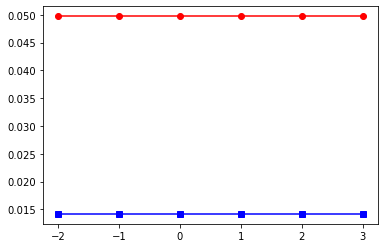

In [125]:
from sklearn.linear_model import Lasso, LinearRegression
landa = [0.01, 0.1, 1, 10, 100, 1000]
mse_tr = []
mse_te = []
for k in landa:
    model = Lasso(alpha=k)
    model.fit(X_train, y_train)
    y_pre_tr = model.predict(X_train)
    y_pre_te = model.predict(X_test)
    mse_tr.append(mse_error(y_train, y_pre_tr))
    mse_te.append(mse_error(y_test, y_pre_te))

plt.plot(np.log10(landa), mse_tr, 'b-s')
plt.plot(np.log10(landa), mse_te, 'r-o')

In [126]:
alpha = 0.00001
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)
model.coef_


array([ 0.        , -0.2688706 ,  0.29275686, -0.9599704 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.14904066,
        0.05087024])